In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
%matplotlib inline
# -*- coding: utf-8 -*-

from sklearn.linear_model import LinearRegression

In [2]:
journeys = pd.read_excel('tube-passenger-journeys.xlsx')

In [3]:
journeys

,Passenger Journeys ('000),2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12
0,Bakerloo,94243.0,96670.40,89101.80,96451.30,97807.6,101249.0,98863.2,104122.0,111136.0
1,Central,176144.0,184519.00,185091.00,205765.00,221687.0,229904.0,222247.0,237497.0,260916.0
2,Waterloo & City,10196.4,9680.16,9238.07,5516.61,10135.5,11253.5,11059.9,13178.2,15891.5
3,Circle & Ham,107080.0,108147.00,102174.00,112712.00,113255.0,120854.0,114342.0,106388.0,114609.0
4,District,176563.0,181029.00,173618.00,192112.00,196565.0,198548.0,187469.0,195339.0,208317.0
5,Jubilee,137180.0,144938.00,147675.00,167693.00,182056.0,179180.0,173571.0,185205.0,213554.0
6,Metropolitan,53221.4,53307.40,52982.10,59654.90,63696.0,65295.0,60006.7,62555.3,66779.4
7,Northern,199717.0,205566.00,195777.00,212851.00,228069.0,236039.0,232007.0,237422.0,252310.0
8,Piccadilly,173165.0,176102.00,166685.00,187105.00,194825.0,191891.0,187538.0,194811.0,210169.0
9,Victoria,160045.0,164809.00,163036.00,173040.00,178976.0,179543.0,172984.0,175936.0,199988.0


In [4]:
new_columns = journeys.columns.values
new_columns[0] = 'journeys_000s'
journeys.columns = new_columns
journeys.set_index('journeys_000s', drop=True, inplace=True)

In [5]:
journeys = journeys.T

In [6]:
journeys['year'] = np.arange(1, 10)
journeys.rename(columns={'Circle & Ham': 'Circle / H&C'}, inplace=True)
journeys

journeys_000s,Bakerloo,Central,Waterloo & City,Circle / H&C,District,Jubilee,Metropolitan,Northern,Piccadilly,Victoria,year
2003/04,94243.0,176144.0,10196.40,107080.0,176563.0,137180.0,53221.4,199717.0,173165.0,160045.0,1
2004/05,96670.4,184519.0,9680.16,108147.0,181029.0,144938.0,53307.4,205566.0,176102.0,164809.0,2
2005/06,89101.8,185091.0,9238.07,102174.0,173618.0,147675.0,52982.1,195777.0,166685.0,163036.0,3
2006/07,96451.3,205765.0,5516.61,112712.0,192112.0,167693.0,59654.9,212851.0,187105.0,173040.0,4
2007/08,97807.6,221687.0,10135.50,113255.0,196565.0,182056.0,63696.0,228069.0,194825.0,178976.0,5
2008/09,101249.0,229904.0,11253.50,120854.0,198548.0,179180.0,65295.0,236039.0,191891.0,179543.0,6
2009/10,98863.2,222247.0,11059.90,114342.0,187469.0,173571.0,60006.7,232007.0,187538.0,172984.0,7
2010/11,104122.0,237497.0,13178.20,106388.0,195339.0,185205.0,62555.3,237422.0,194811.0,175936.0,8
2011/12,111136.0,260916.0,15891.50,114609.0,208317.0,213554.0,66779.4,252310.0,210169.0,199988.0,9


In [7]:
cols = journeys.columns.tolist()
cols

['Bakerloo',
 'Central',
 'Waterloo & City',
 'Circle / H&C',
 'District',
 'Jubilee',
 'Metropolitan',
 'Northern',
 'Piccadilly',
 'Victoria',
 'year']

In [8]:
new_col_order = list([cols[1],  cols[7], cols[5], cols[8], cols[4], cols[9], cols[3], cols[0], cols[6], cols[2], cols[10]])

In [9]:
new_col_order

['Central',
 'Northern',
 'Jubilee',
 'Piccadilly',
 'District',
 'Victoria',
 'Circle / H&C',
 'Bakerloo',
 'Metropolitan',
 'Waterloo & City',
 'year']

In [10]:
journeys = journeys[new_col_order]
journeys

journeys_000s,Central,Northern,Jubilee,Piccadilly,District,Victoria,Circle / H&C,Bakerloo,Metropolitan,Waterloo & City,year
2003/04,176144.0,199717.0,137180.0,173165.0,176563.0,160045.0,107080.0,94243.0,53221.4,10196.40,1
2004/05,184519.0,205566.0,144938.0,176102.0,181029.0,164809.0,108147.0,96670.4,53307.4,9680.16,2
2005/06,185091.0,195777.0,147675.0,166685.0,173618.0,163036.0,102174.0,89101.8,52982.1,9238.07,3
2006/07,205765.0,212851.0,167693.0,187105.0,192112.0,173040.0,112712.0,96451.3,59654.9,5516.61,4
2007/08,221687.0,228069.0,182056.0,194825.0,196565.0,178976.0,113255.0,97807.6,63696.0,10135.50,5
2008/09,229904.0,236039.0,179180.0,191891.0,198548.0,179543.0,120854.0,101249.0,65295.0,11253.50,6
2009/10,222247.0,232007.0,173571.0,187538.0,187469.0,172984.0,114342.0,98863.2,60006.7,11059.90,7
2010/11,237497.0,237422.0,185205.0,194811.0,195339.0,175936.0,106388.0,104122.0,62555.3,13178.20,8
2011/12,260916.0,252310.0,213554.0,210169.0,208317.0,199988.0,114609.0,111136.0,66779.4,15891.50,9


In [11]:
journeys.iloc[1, 0]

184519.0

In [12]:
tick_names = journeys.index.values
extra_years = ['2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19']
tick_names = np.concatenate((tick_names, extra_years))
tick_names

array(['2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09',
       '2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15',
       '2015/16', '2016/17', '2017/18', '2018/19'], dtype=object)

In [13]:
colors = ['red', 'black', 'silver', 'mediumblue', 'green', 'deepskyblue', 'gold', 'sienna', 'mediumvioletred', 'paleturquoise']

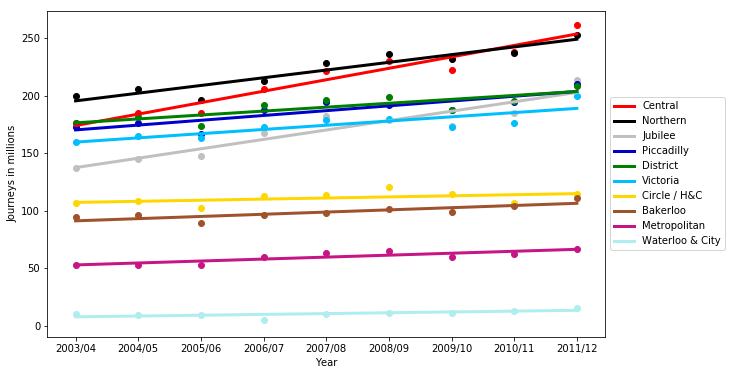

In [14]:
plt.figure(figsize=(10, 6))

for col in np.arange(0, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3)
    plt.xticks(np.arange(1,10), journeys.index)
plt.xlabel('Year')
plt.ylabel('Journeys in millions')
plt.legend(journeys.columns[0:10], loc='upper left', bbox_to_anchor=(1, 0.75))
plt.show()

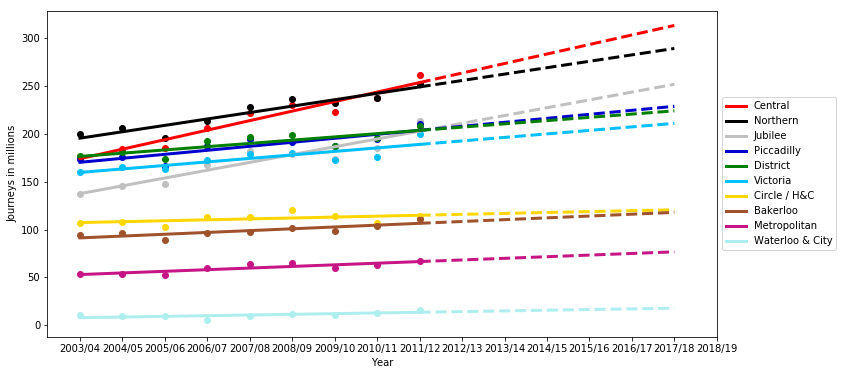

In [15]:
plt.figure(figsize=(12, 6))

for col in np.arange(0, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3)
    plt.xticks(np.arange(1,17), tick_names)
for col in np.arange(0, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color=colors[col], linestyle='dashed', linewidth=3)
    plt.xticks(np.arange(1,17), tick_names)
plt.xlabel('Year')
plt.ylabel('Journeys in millions')
plt.legend(journeys.columns[0:10], loc='upper left', bbox_to_anchor=(1, 0.75))
plt.show()

In [16]:
labels_test = journeys.columns.values.copy()

labels_test = labels_test[0:10]
type(labels_test)

numpy.ndarray

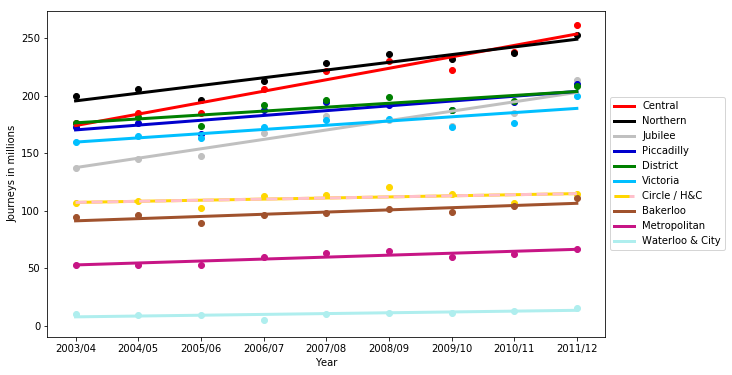

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,10), journeys.index)
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color='gold', linewidth=3, linestyle='-', label=journeys.columns[col])
    plt.plot(x, regr.predict(x), color='pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line1 = lines.Line2D([], [], linewidth=3, linestyle="--", dashes=(10, 1), color='pink')
    dotted_line2 = lines.Line2D([], [], linewidth=3, linestyle='-', dashes=(5, 4), color='gold')
    plt.xticks(np.arange(1,10), journeys.index)
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,10), journeys.index)
plt.xlabel('Year')
plt.ylabel('Journeys in millions')
handles, labels = ax.get_legend_handles_labels()
plt.legend((handles[0:6] + [(dotted_line1, dotted_line2)] + handles[8:11]), (labels[0:6] + labels[7:11]), loc='upper left', bbox_to_anchor=(1, 0.75))
plt.show()

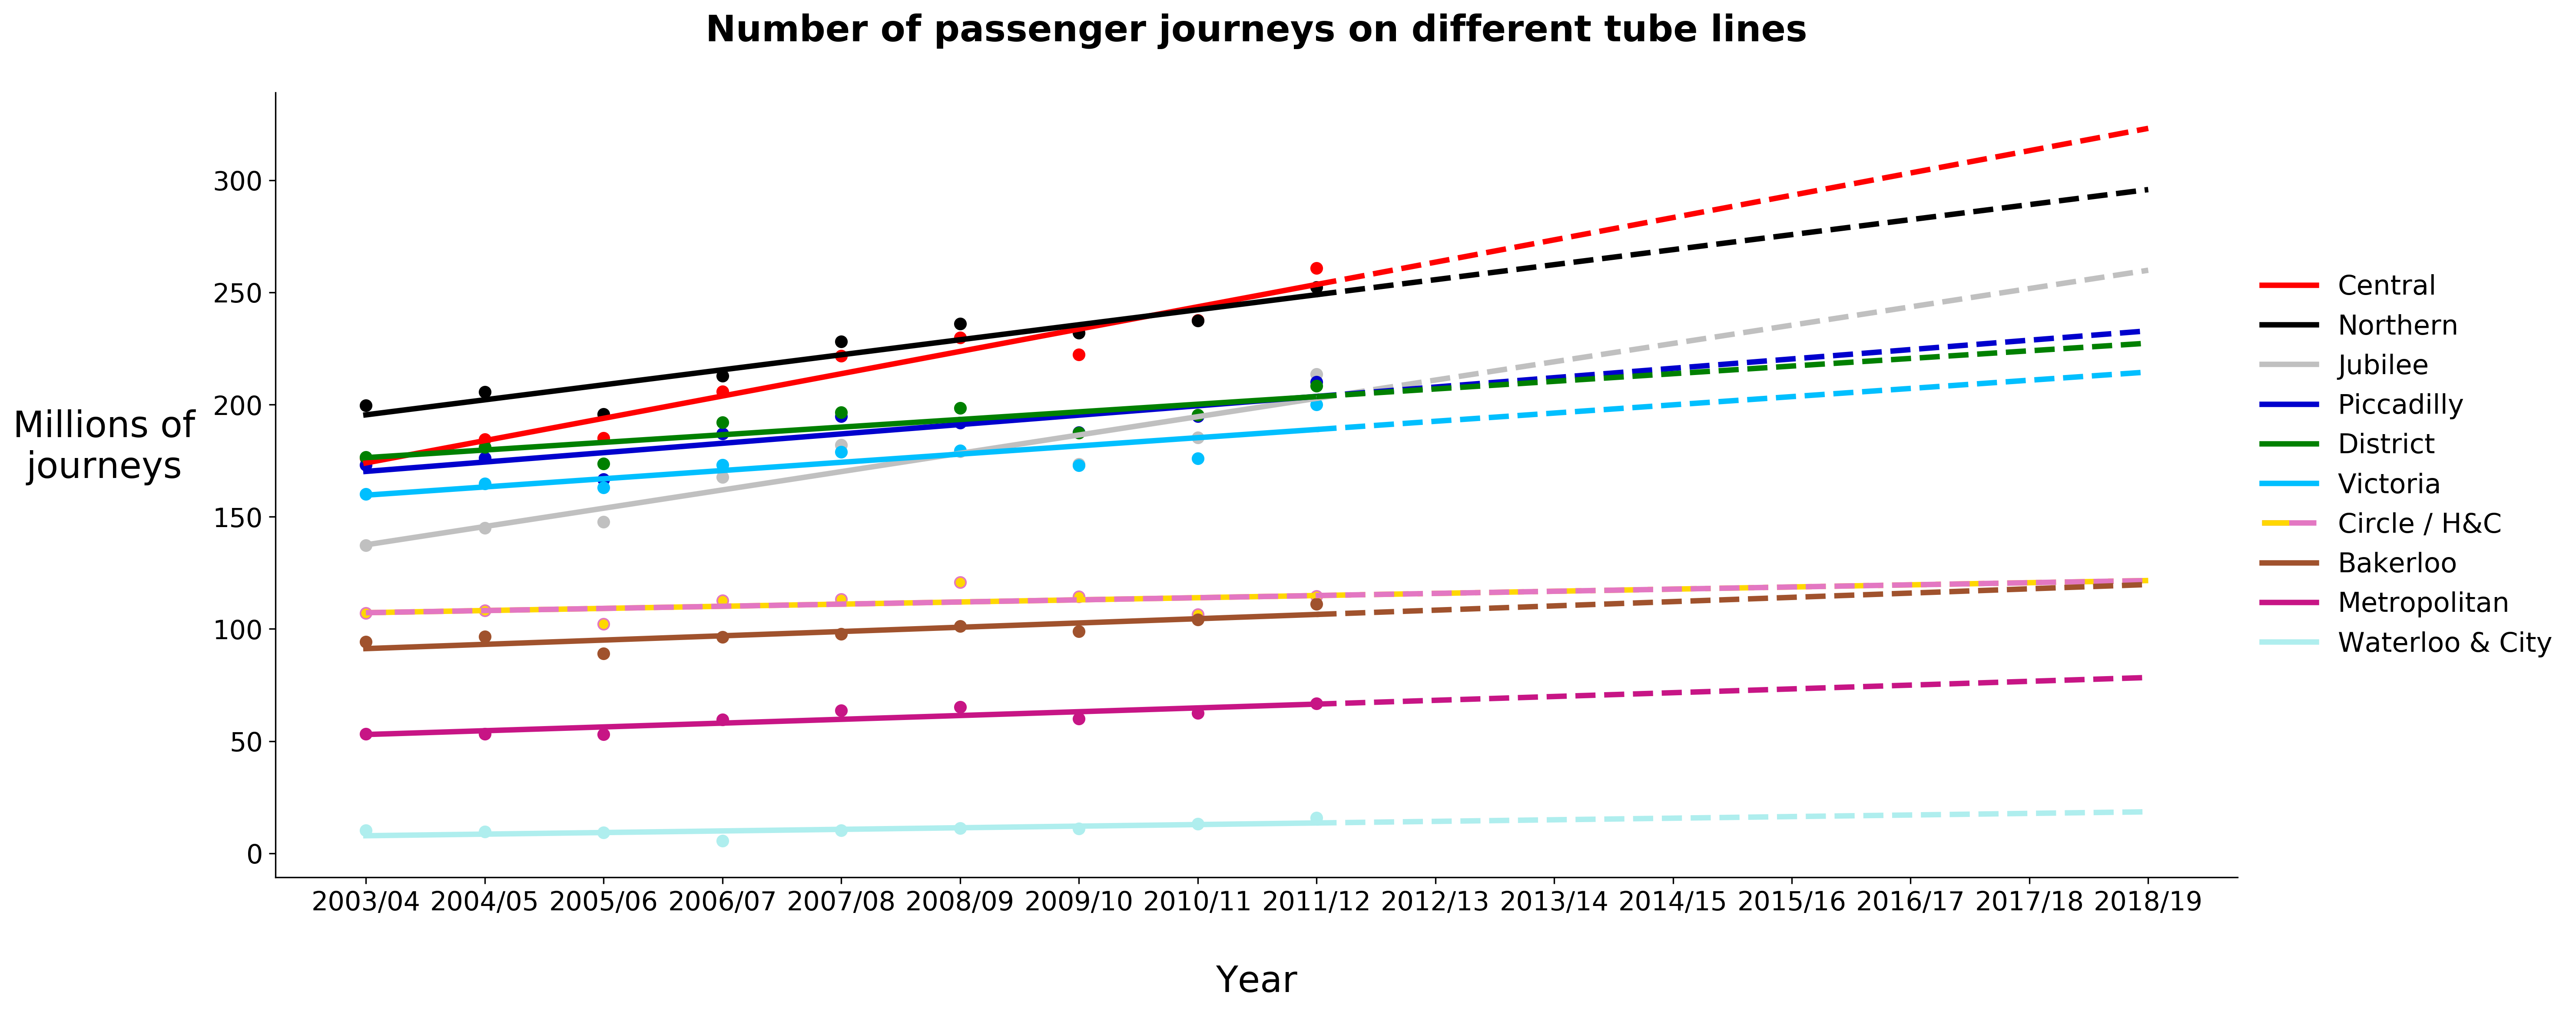

In [18]:
results = pd.DataFrame({'year': extra_years})

plt.rcParams.update({'font.size': 14.5})
fig, ax = plt.subplots(figsize=(20, 8), dpi=300)
#ax.set_facecolor('linen')

## Plot solid lines up until Circle / H&C
for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,17), tick_names)
    
## Plot solid Circle / H&C
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color='tab:pink')
    plt.scatter(x, y, s=18, color='gold')
    plt.plot(x, regr.predict(x), color='gold', linewidth=3, linestyle='-', label=journeys.columns[col])
    plt.plot(x, regr.predict(x), color='tab:pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line1 = lines.Line2D([], [], linewidth=3, linestyle="--", dashes=(10, 1), color='tab:pink')
    dotted_line2 = lines.Line2D([], [], linewidth=3, linestyle='-', dashes=(5, 5), color='gold')
    plt.xticks(np.arange(1,17), tick_names)
    
## Plot lines after Circle / H&C
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,17), tick_names)
    
## Plot dashed prediction lines
for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color=colors[col], linewidth=3, linestyle='dashed', label=journeys.columns[col])
    plt.xticks(np.arange(1,17), tick_names)
    results[journeys.columns[col]] = np.array(regr.predict(x2)[1:])
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color='gold', linewidth=3, linestyle='-.', label=journeys.columns[col])
    plt.plot(x2, regr.predict(x2), color='tab:pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line3 = lines.Line2D([], [], linewidth=3, linestyle="--", color='tab:pink')
    dotted_line4 = lines.Line2D([], [], linewidth=3, linestyle='-', color='gold')
    plt.xticks(np.arange(1,17), tick_names)
    results[journeys.columns[col]] = np.array(regr.predict(x2)[1:])
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color=colors[col], linewidth=3, linestyle='dashed', label=journeys.columns[col])
    plt.xticks(np.arange(1,17), tick_names)
    results[journeys.columns[col]] = np.array(regr.predict(x2)[1:])

## Graph features
plt.xlabel('\nYear', fontsize=20)
plt.ylabel('Millions of\njourneys', fontsize=20, rotation=0, labelpad=60)
handles, labels = ax.get_legend_handles_labels()
plt.legend((handles[0:6] + [(dotted_line1, dotted_line2)] + handles[8:11]),
           (labels[0:6] + labels[7:11]),
           loc='upper left',
           bbox_to_anchor=(1, 0.8),
          frameon=False,
          prop={'size': 15})
plt.title('Number of passenger journeys on different tube lines\n', fontsize=20, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('journeys-extend.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [19]:
results.set_index('year', drop=True, inplace=True)
results

,Central,Northern,Jubilee,Piccadilly,District,Victoria,Circle / H&C,Bakerloo,Metropolitan,Waterloo & City
year,,,,,,,,,,
2012/13,263.458306,255.661000,210.914889,207.807472,206.958111,192.557889,115.838750,108.369975,68.194106,14.237905
2013/14,273.399522,262.354133,219.074489,211.984722,210.359511,196.217089,116.794033,110.274097,69.888522,14.948823
2014/15,283.340739,269.047267,227.234089,216.161972,213.760911,199.876289,117.749317,112.178218,71.582939,15.659740
2015/16,293.281956,275.740400,235.393689,220.339222,217.162311,203.535489,118.704600,114.082340,73.277356,16.370658
2016/17,303.223172,282.433533,243.553289,224.516472,220.563711,207.194689,119.659883,115.986462,74.971772,17.081576
2017/18,313.164389,289.126667,251.712889,228.693722,223.965111,210.853889,120.615167,117.890583,76.666189,17.792494
2018/19,323.105606,295.819800,259.872489,232.870972,227.366511,214.513089,121.570450,119.794705,78.360606,18.503412


In [20]:
soiling = pd.read_excel('Soiling-incidents-tube-2018.xlsx')

In [21]:
soiling.columns = ['Line', 'Count']
soiling.set_index('Line', drop=True, inplace=True)

In [22]:
soiling = soiling.T

In [23]:
scols = soiling.columns.values
new_soilingcols = list([scols[2], scols[6], scols[4], scols[7], scols[3], scols[8], scols[1], scols[0], scols[5], scols[9]])
soiling = soiling[new_soilingcols]


In [24]:
newcols = soiling.columns.values
newcols

array(['Central', 'Northern', 'Jubilee', 'Piccadilly', 'District',
       'Victoria', 'Circle and Hammersmith & City', 'Bakerloo',
       'Metropolitan', 'Waterloo & City'], dtype=object)

In [25]:
newcols[6] = 'Circle / H&C'

In [26]:
soiling

Line,Central,Northern,Jubilee,Piccadilly,District,Victoria,Circle / H&C,Bakerloo,Metropolitan,Waterloo & City
Count,101,221,113,90,50,75,45,48,55,3


In [27]:
journeys_soiling = pd.concat([results.T, soiling.T], axis=1)
journeys_soiling

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count
Line,,,,,,,,
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55


In [28]:
journeys_soiling['per_person'] = journeys_soiling['Count'] / journeys_soiling['2018/19']
journeys_soiling

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person
Line,,,,,,,,,
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883


In [29]:
journeys_soiling_count = journeys_soiling.copy()
journeys_soiling_count.sort_values('Count', ascending=False, inplace=True)
journeys_soiling_count

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person
Line,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156


In [30]:
tube_color_dict = {
    'Central':'red',
    'Northern': 'black',
    'Jubilee': 'silver', 
    'Piccadilly': 'mediumblue', 
    'District': 'green', 
    'Victoria': 'deepskyblue', 
    'Circle / H&C': 'yellow', 
    'Bakerloo': 'sienna', 
    'Metropolitan': 'mediumvioletred', 
    'Waterloo & City': 'paleturquoise'
}

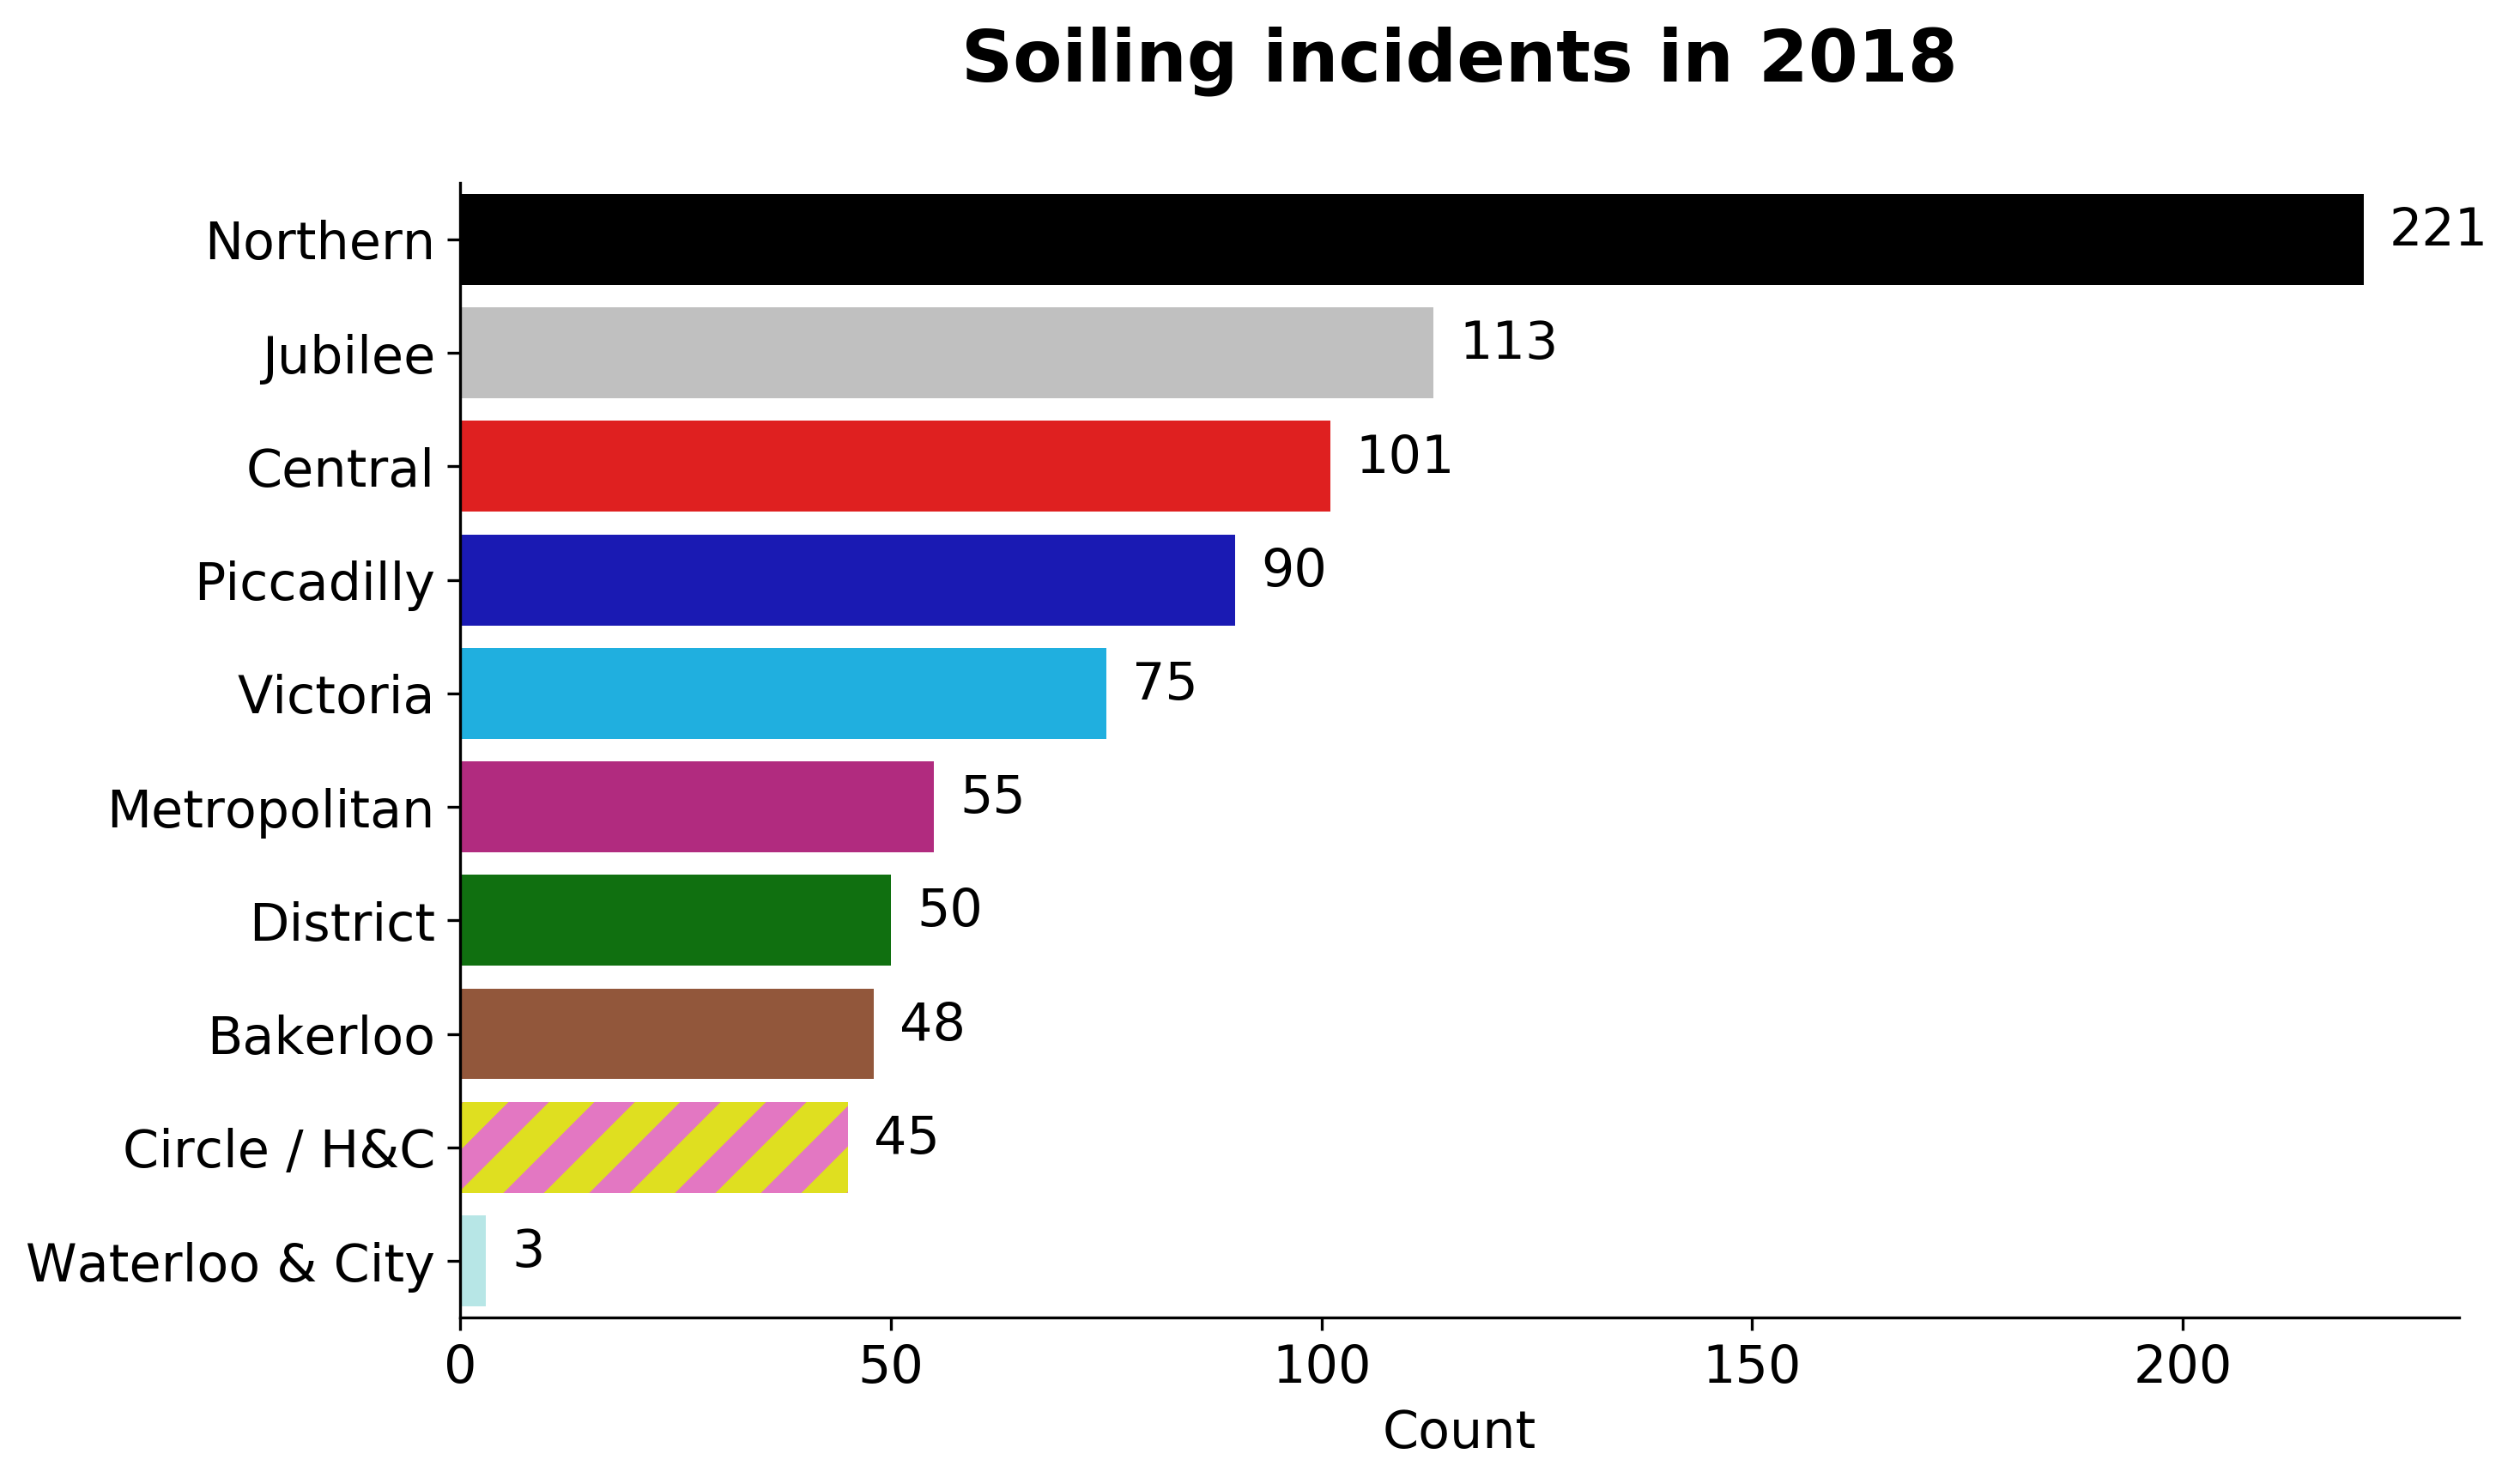

In [31]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

plt.rcParams.update({'hatch.color': 'tab:pink', 'hatch.linewidth': 8.0})
bar = sns.barplot(journeys_soiling_count['Count'], journeys_soiling_count.index,
           palette = tube_color_dict)
hatches = ['','' ,'' ,'' ,'' ,'' ,'' ,'' , '/','' ]
for i,thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3,
            p.get_y()+0.45,
            '{:1.0f}'.format(width))
            #fontsize= 12)
plt.ylabel('')
plt.xlabel('Count')
plt.title('Soiling incidents in 2018\n', fontsize=20, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('soiling-incidents-count.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [32]:
journeys_soiling_pp = journeys_soiling.copy()
journeys_soiling_pp.sort_values('per_person', ascending=False, inplace=True)
journeys_soiling_pp

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person
Line,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909


In [33]:
journeys_soiling_pp_c0 = journeys_soiling_pp.copy()
journeys_soiling_pp_c0.loc['Circle / H&C', 'per_person' ] = 0

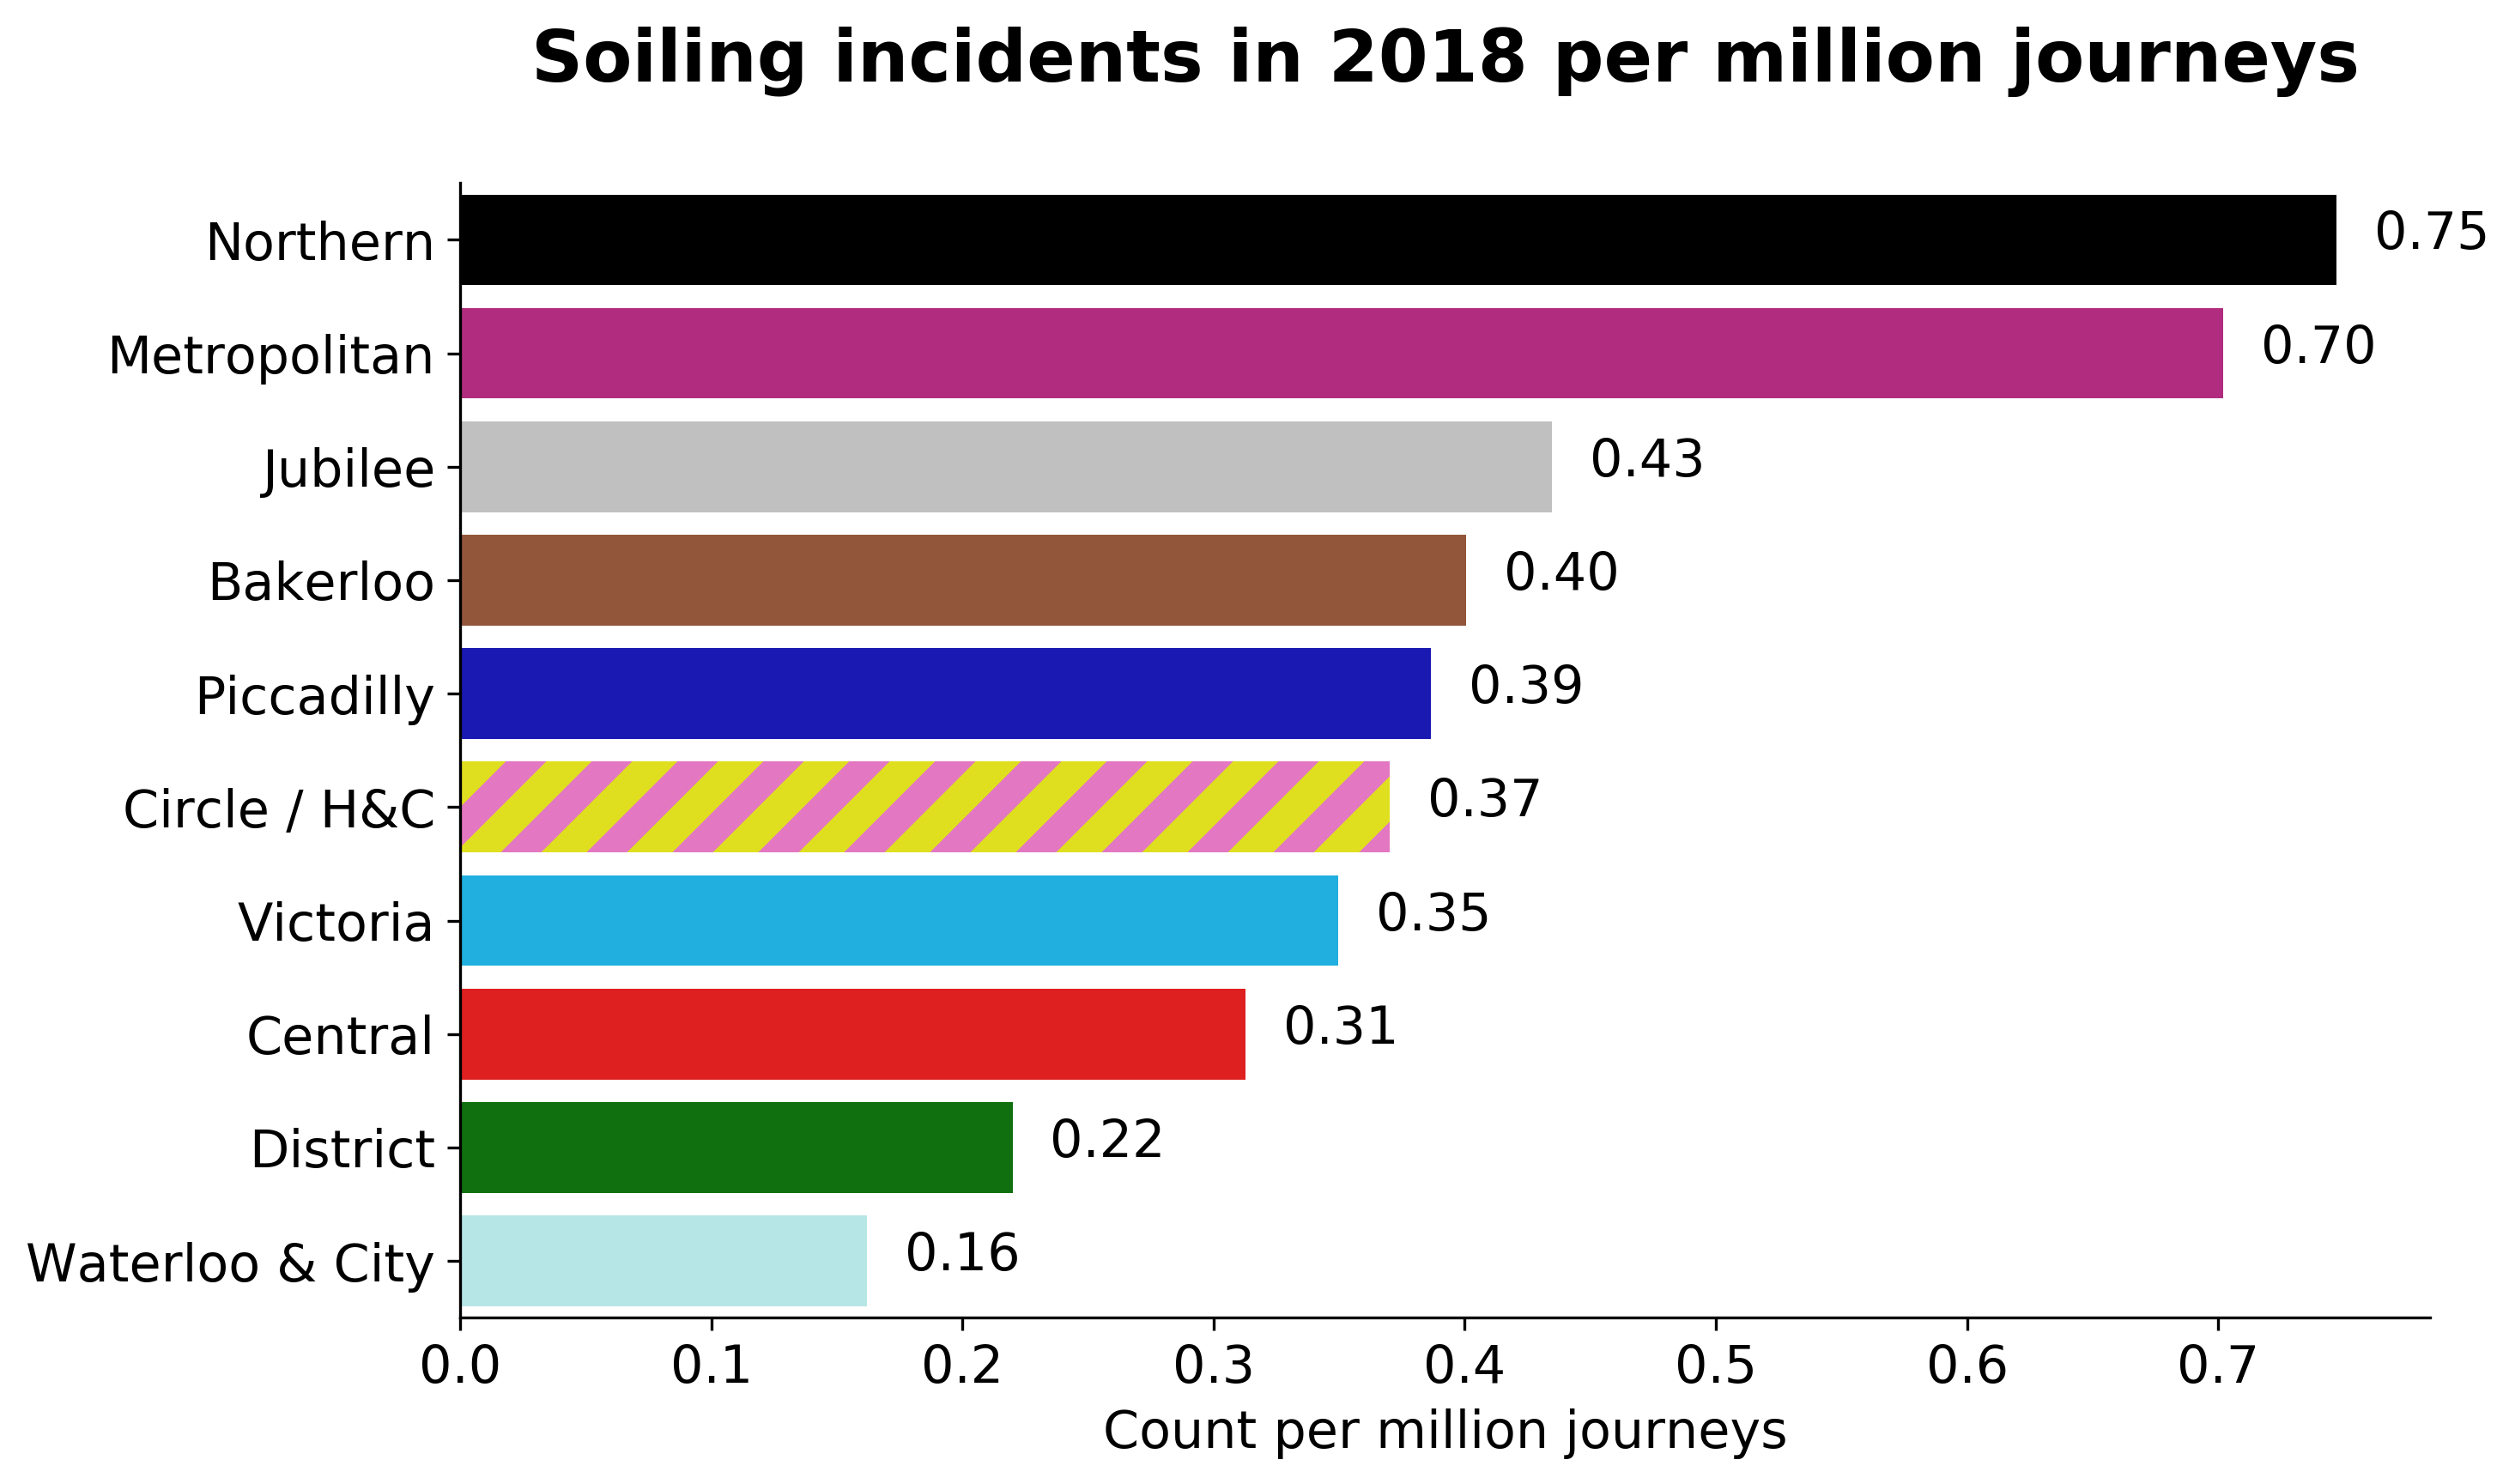

In [34]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))
plt.rcParams.update({'font.size': 14.5})
bar = sns.barplot(journeys_soiling_pp['per_person'], journeys_soiling_pp.index,
           palette = tube_color_dict)
hatches = ['','' ,'' ,'' ,'' ,'/' ,'' ,'' , '','' ]
for i,thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.015,
            p.get_y()+0.48,
            '{:1.2f}'.format(width))
plt.ylabel('')
plt.xlabel('Count per million journeys')
plt.title('Soiling incidents in 2018 per million journeys\n', fontsize=20, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('soiling-incidents-per-mill.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

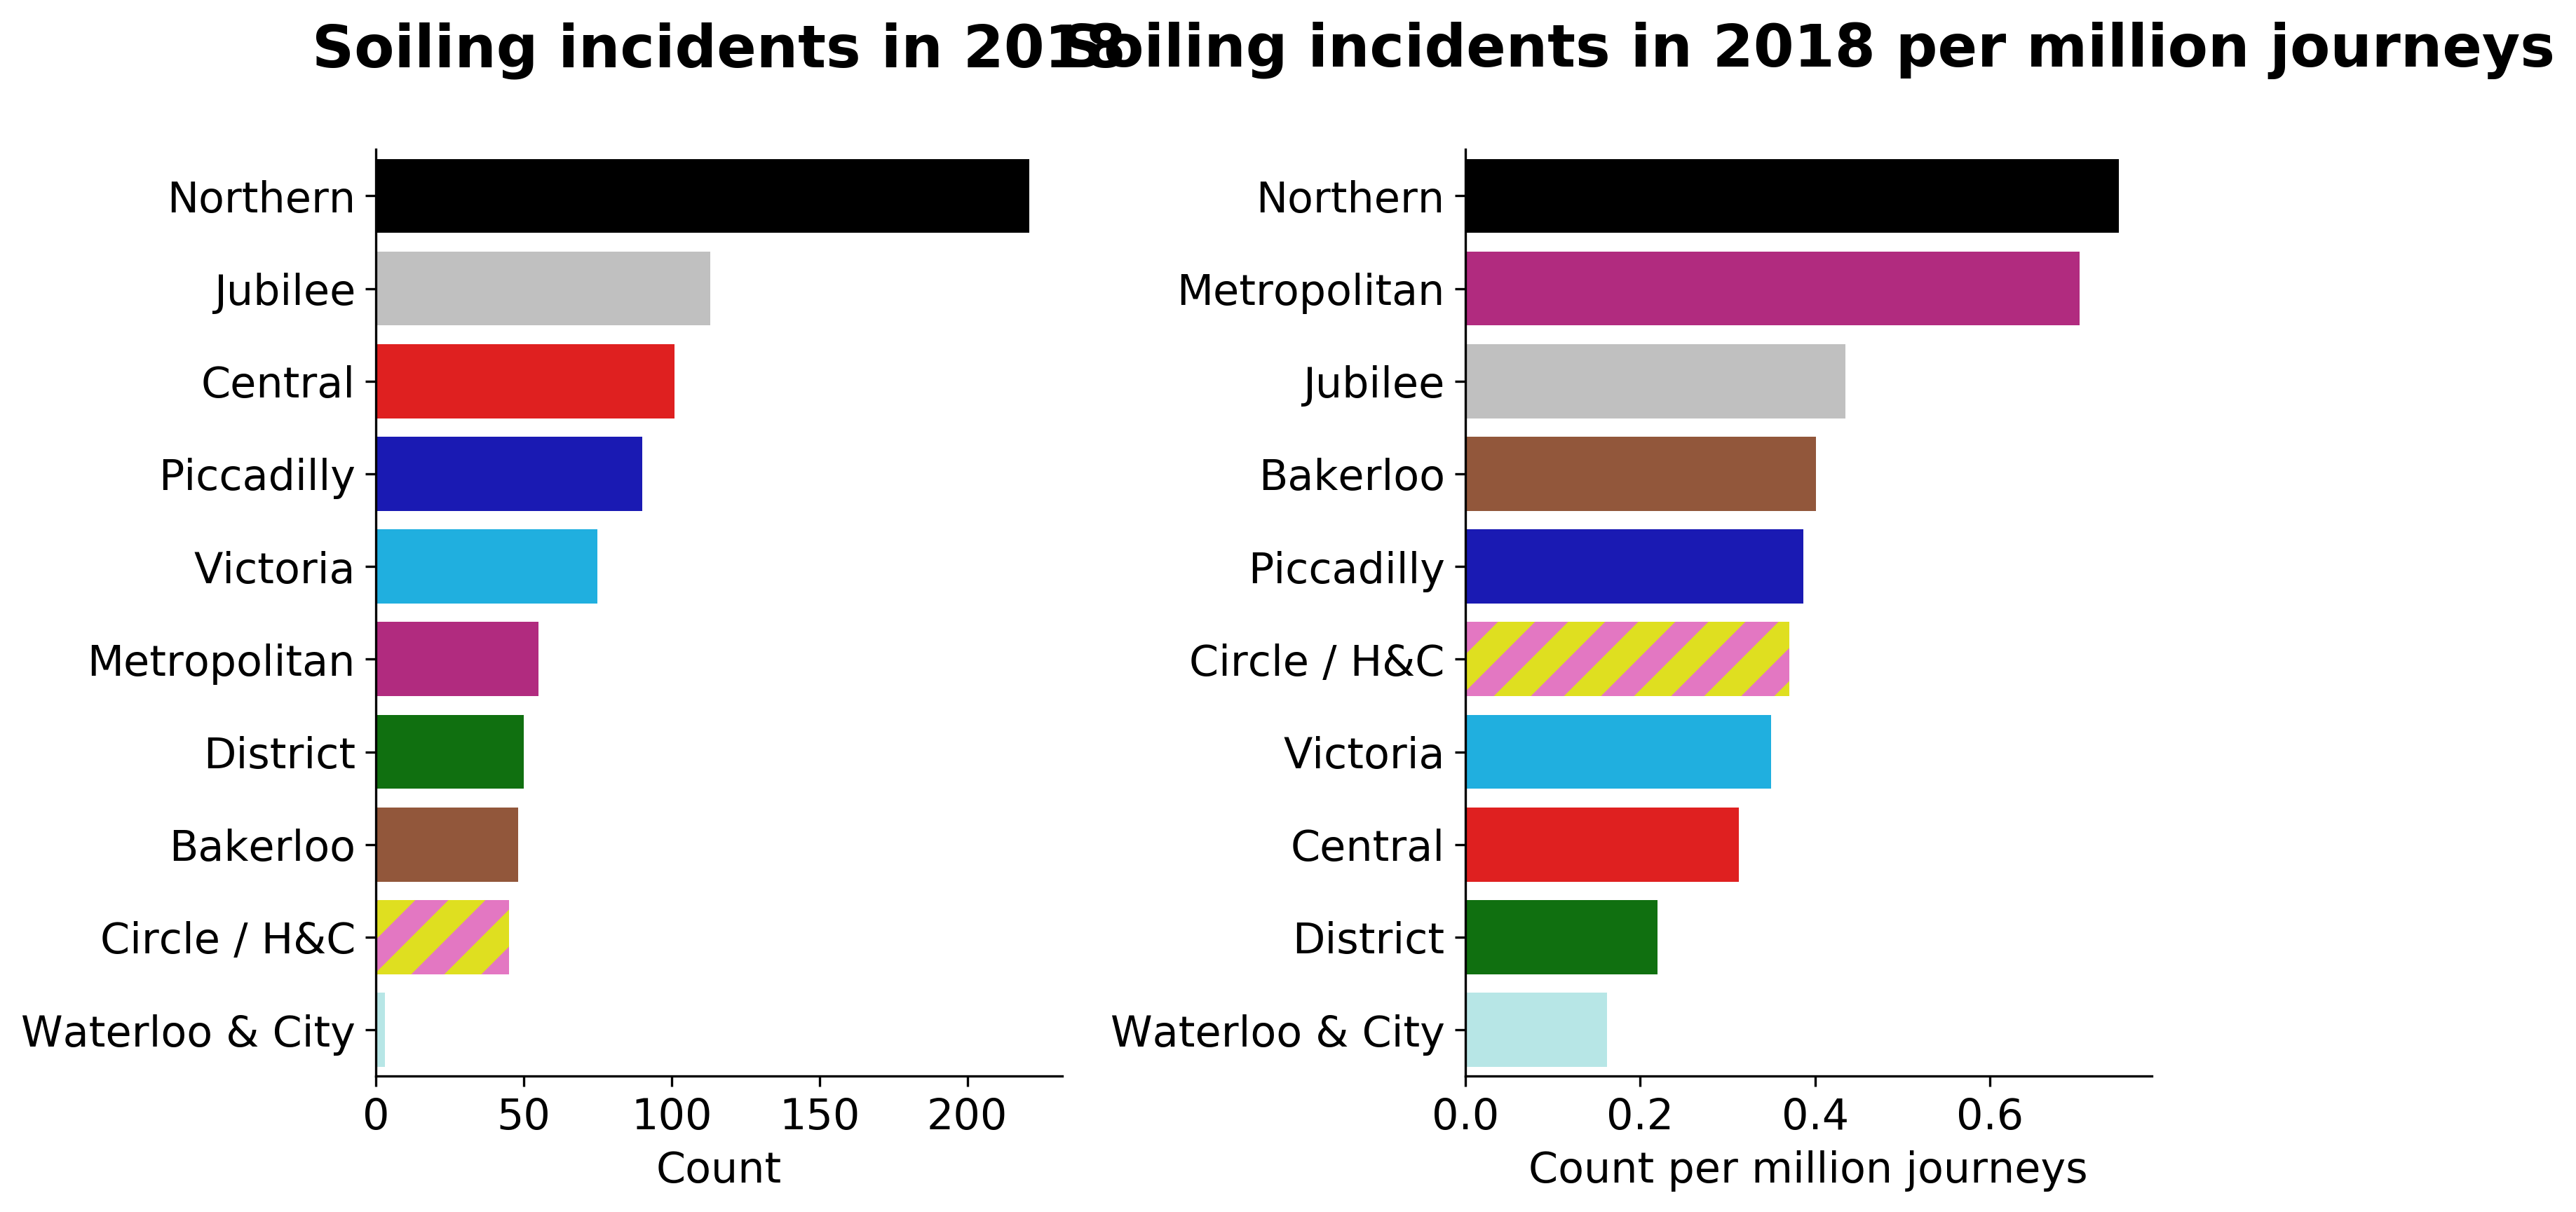

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=300)

ax1 = plt.subplot(1, 2, 1)
plt.rcParams.update({'hatch.color': 'tab:pink', 'hatch.linewidth': 8.0})
bar = sns.barplot(journeys_soiling_count['Count'], journeys_soiling_count.index,
           palette = tube_color_dict)
hatches = ['','' ,'' ,'' ,'' ,'' ,'' ,'' , '/','' ]
for i,thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])
plt.ylabel('')
plt.xlabel('Count')
plt.title('Soiling incidents in 2018\n', fontsize=20, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(1, 2, 2)
bar = sns.barplot(journeys_soiling_pp['per_person'], journeys_soiling_pp.index,
           palette = tube_color_dict)
hatches = ['','' ,'' ,'' ,'' ,'/' ,'' ,'' , '','' ]
for i,thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])
plt.ylabel('')
plt.xlabel('Count per million journeys')
plt.title('Soiling incidents in 2018 per million journeys\n', fontsize=20, fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('soiling-incidents-both.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [36]:
#fig, ax = plt.subplots(1, 1, dpi=300, figsize=(12, 8))

#plt.subplot(1, 1, 1)
#plt.rcParams.update({'font.size': 14.5, 'hatch.color': 'tab:pink', 'hatch.linewidth': 8})
#bar = sns.barplot(journeys_soiling_pp['per_person'], journeys_soiling_pp.index,
#           palette = tube_color_dict)
#hatches = ['','' ,'' ,'' ,'' ,'/' ,'' ,'' , '','' ]
#for i,thisbar in enumerate(bar.patches):
#    thisbar.set_hatch(hatches[i])

#plt.subplot(1, 1, 1)
#plt.rcParams.update({'font.size': 14.5, 'font.sans-serif': 'Arial', 'hatch.color': 'black', 'hatch.linewidth': 1})
#bar2 = sns.barplot(journeys_soiling_pp_c0['per_person'], journeys_soiling_pp_c0.index,
#           palette = tube_color_dict)
#hatches2 = ['','' ,'' ,'' ,'' ,'' ,'' ,'' , '','' ,'*','' ,'*' ,'' ,'*', '', '*' ,'*' ,'' ,'' ]
#for i2, thisbar2 in enumerate(bar2.patches):
#    print(i2)
#    print(bar2.patches[i2])
#    print(hatches2[i2])
#    thisbar2.set_hatch(hatches2[i2])

#for p in ax.patches:
#    width = p.get_width()
#    ax.text(width + 0.015,
#            p.get_y()+0.48,
#            '{:1.2f}'.format(width))
#plt.ylabel('')
#plt.xlabel('Count per million journeys')
#plt.title('Soiling incidents in 2018 per million journeys\n', fontname='Arial', fontweight='bold')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#plt.tight_layout()
#plt.savefig('soiling-incidents-night-tube.png', bbox_inches='tight', pad_inches=0.5)
#plt.show()

In [37]:
index_moon =  [u'\u263E' ' Northern', 'Metropolitan', u'\u263E' ' Jubilee', 'Bakerloo', u'\u263E' ' Piccadilly', 'Circle / H&C', u'\u263E' ' Victoria', u'\u263E' ' Central', 'District', 'Waterloo & City']
index_moon

['☾ Northern',
 'Metropolitan',
 '☾ Jubilee',
 'Bakerloo',
 '☾ Piccadilly',
 'Circle / H&C',
 '☾ Victoria',
 '☾ Central',
 'District',
 'Waterloo & City']

In [38]:
journeys_soiling_pp_moon = journeys_soiling.copy()
journeys_soiling_pp_moon.sort_values('per_person', ascending=False, inplace=True)
journeys_soiling_pp_moon['index_moon'] = index_moon
#journeys_soiling_pp_moon.set_index(index_moon, drop=True, inplace=True)
journeys_soiling_pp_moon

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person,index_moon
Line,,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076,☾ Northern
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883,Metropolitan
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829,☾ Jubilee
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685,Bakerloo
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480,☾ Piccadilly
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156,Circle / H&C
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629,☾ Victoria
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591,☾ Central
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909,District


In [39]:
index_moon2 = [u'\u263E' ' Northern', u'\u263E' ' Jubilee', u'\u263E' ' Central', u'\u263E' ' Piccadilly', u'\u263E' ' Victoria', 'Metropolitan', 'District', 'Bakerloo', 'Circle / H&C', 'Waterloo & City']
index_moon3 = ['Northern ' u'\u263E' , 'Jubilee ' u'\u263E' , 'Central ' u'\u263E' ,'Piccadilly ' u'\u263E' ,'Victoria ' u'\u263E' , 'Metropolitan', 'District', 'Bakerloo', 'Circle / H&C', 'Waterloo & City']
journeys_soiling_count_moon = journeys_soiling.copy()
journeys_soiling_count_moon.sort_values('Count', ascending=False, inplace=True)
journeys_soiling_count_moon['index_moon2'] = index_moon2
journeys_soiling_count_moon['index_moon3'] = index_moon3
journeys_soiling_count_moon

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person,index_moon2,index_moon3
Line,,,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076,☾ Northern,Northern ☾
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829,☾ Jubilee,Jubilee ☾
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591,☾ Central,Central ☾
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480,☾ Piccadilly,Piccadilly ☾
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629,☾ Victoria,Victoria ☾
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883,Metropolitan,Metropolitan
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909,District,District
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685,Bakerloo,Bakerloo
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156,Circle / H&C,Circle / H&C


In [40]:
journeys_soiling_count_moon['2016/17_night'] = journeys_soiling_count_moon['2016/17'] 
journeys_soiling_count_moon['2017/18_night'] = journeys_soiling_count_moon['2017/18']
journeys_soiling_count_moon['2018/19_night'] = journeys_soiling_count_moon['2018/19']

In [41]:
night_tube = pd.DataFrame({
    'month': [12, 24],
    'journeys': [7.8, 8.7]
})

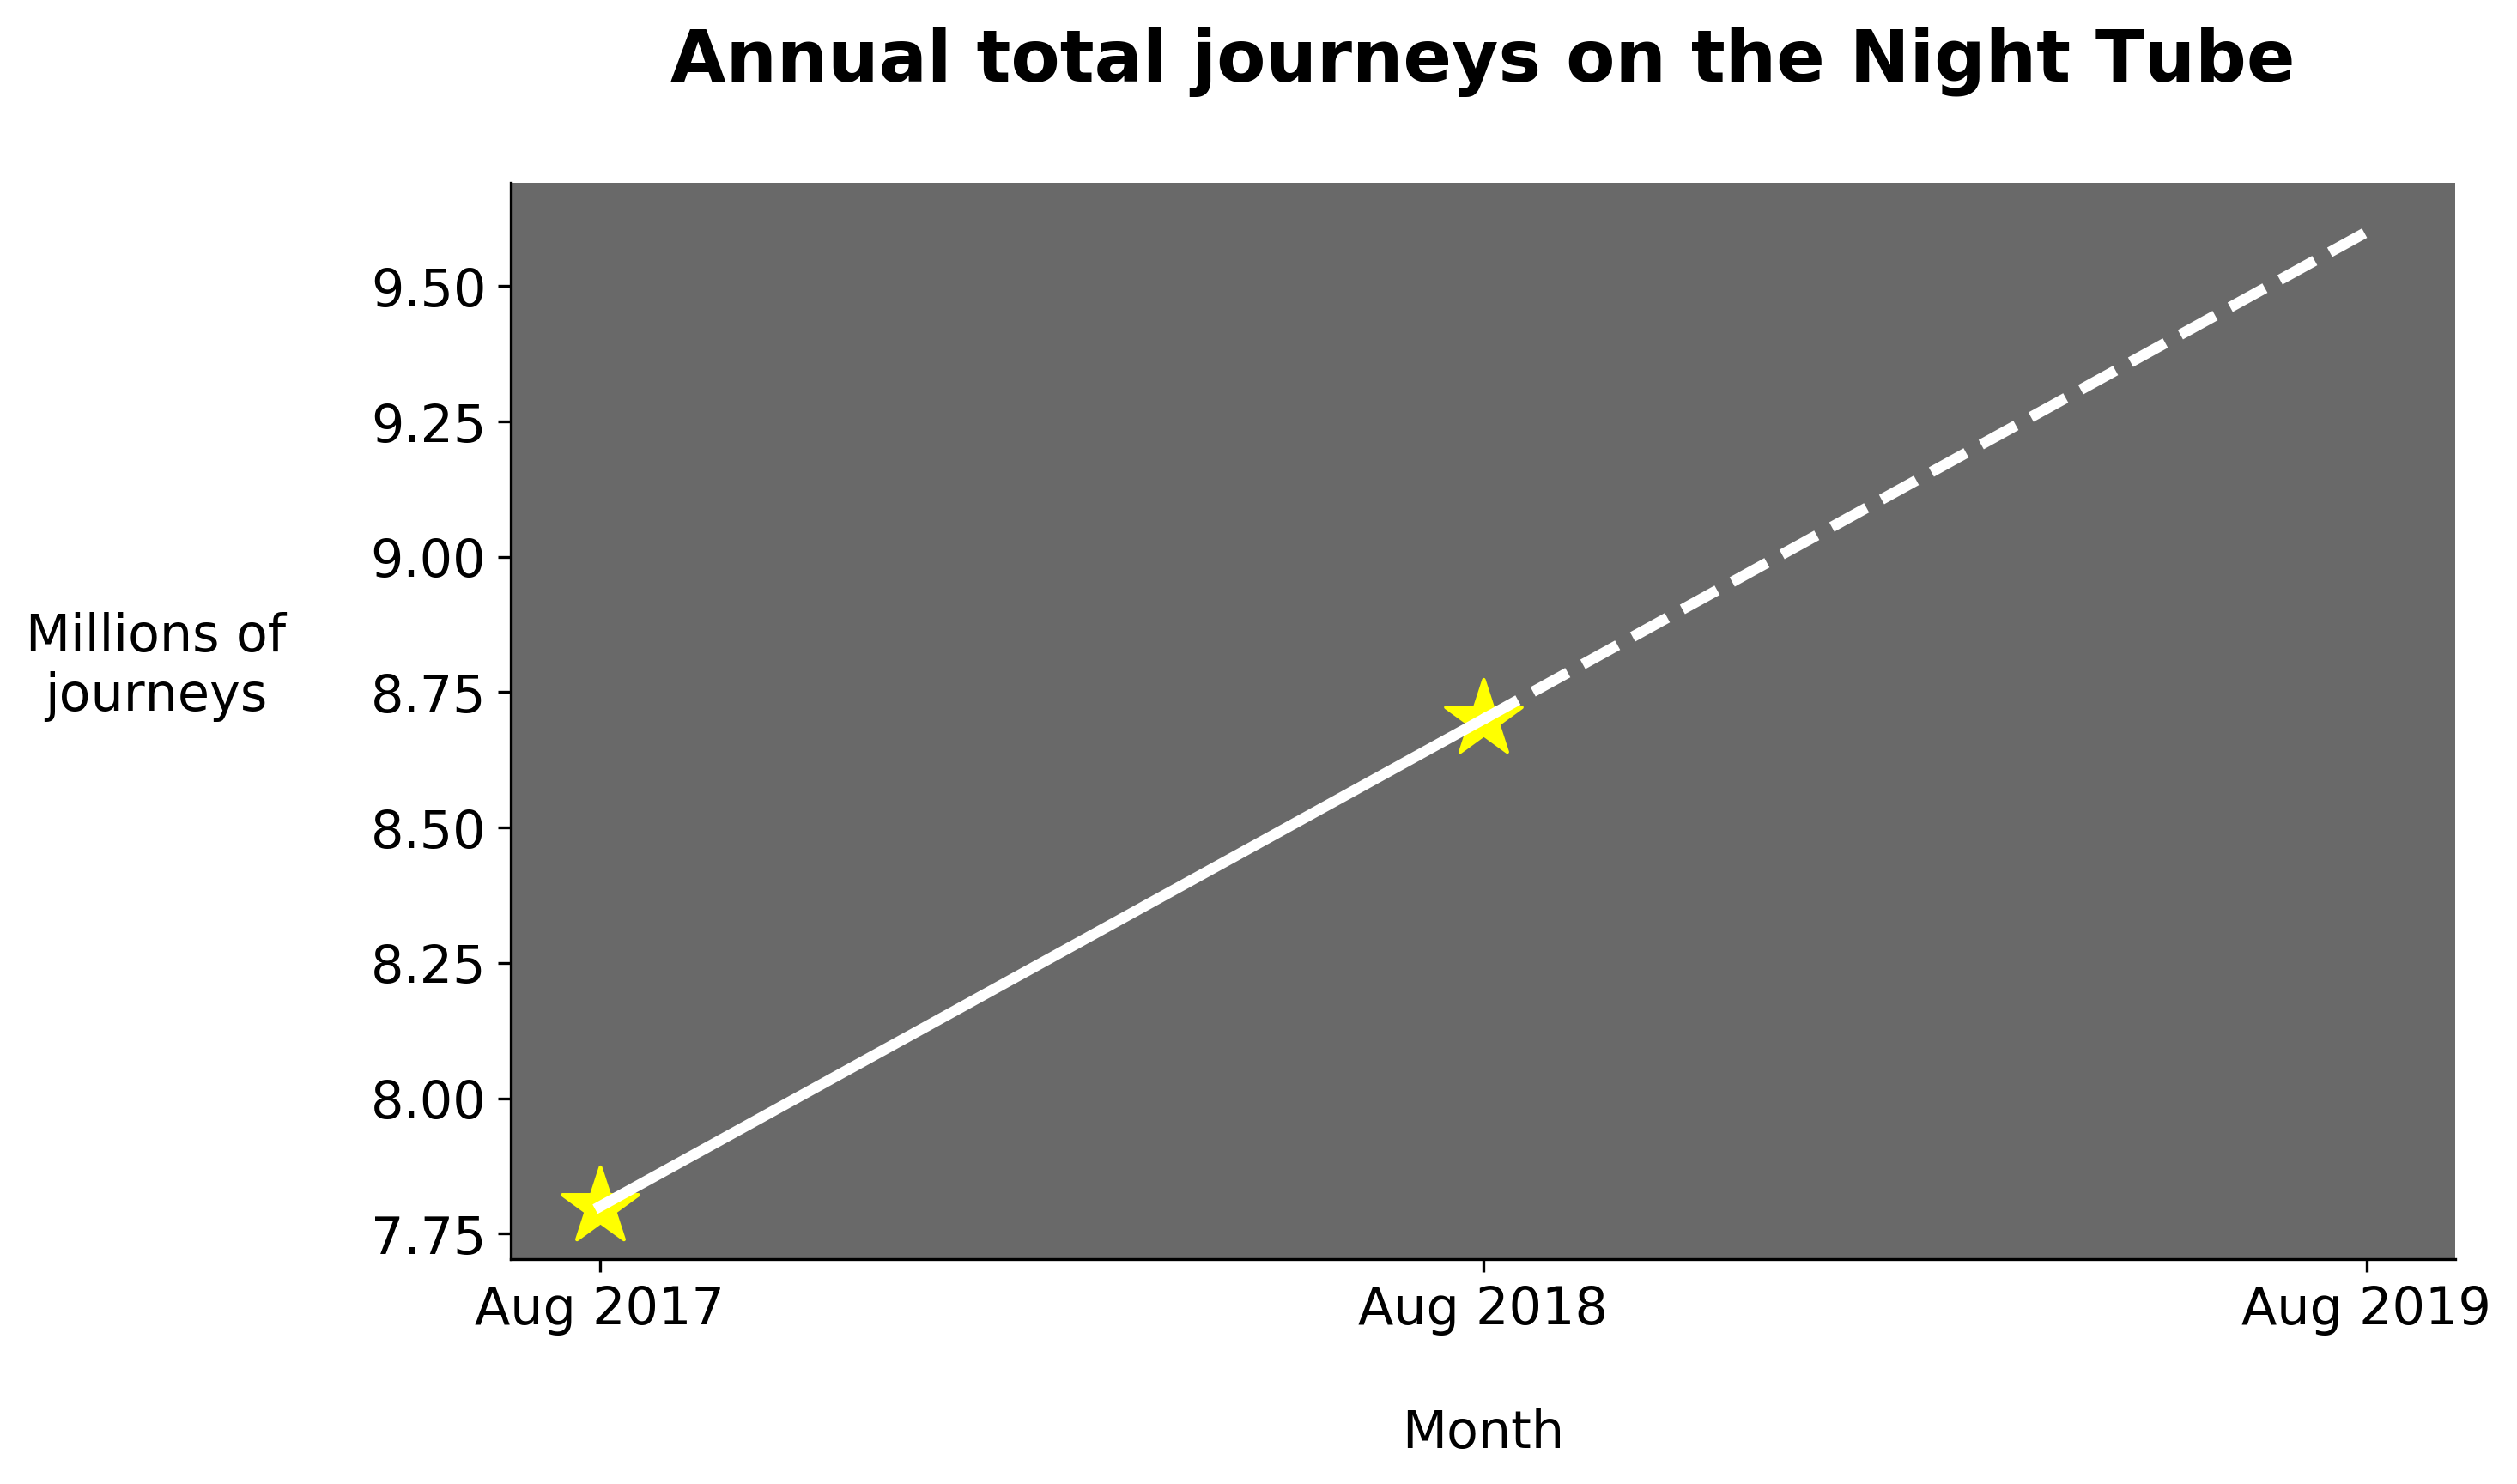

In [54]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_facecolor('dimgray')

x = night_tube['month'].values.reshape(-1, 1)
y = night_tube['journeys']
regr = LinearRegression()
regr.fit(x, y)
plt.scatter(x, y, marker='*', color='yellow', s=500)
plt.plot(x, regr.predict(x), linewidth=3, color='white')
x2 = np.array([24, 36]).reshape(-1, 1)
plt.plot(x2, regr.predict(x2), linestyle='dashed', linewidth=3, color='white')

## Graph features
plt.xlabel('\nMonth')
plt.ylabel('Millions of\njourneys', rotation=0, labelpad=60)
plt.title('Annual total journeys on the Night Tube\n', fontsize=20, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([12, 24, 36], ['Aug 2017', 'Aug 2018', 'Aug 2019'])
plt.tight_layout()
plt.savefig('night-tube.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [43]:
nt_april = regr.predict(np.array([8, 20, 32]).reshape(-1, 1))
nt_april

array([7.5, 8.4, 9.3])

In [44]:
journeys_soiling_count_moon['2016/17_nightpc'] = journeys_soiling_count_moon['2016/17'] / sum(journeys_soiling_count_moon.loc['Northern':'Victoria', '2016/17'])
journeys_soiling_count_moon['2017/18_nightpc'] = journeys_soiling_count_moon['2017/18'] / sum(journeys_soiling_count_moon.loc['Northern':'Victoria', '2017/18'])
journeys_soiling_count_moon['2018/19_nightpc'] = journeys_soiling_count_moon['2018/19'] / sum(journeys_soiling_count_moon.loc['Northern':'Victoria', '2018/19'])

In [45]:
journeys_soiling_count_moon.loc['Metropolitan':, ['2016/17_night', '2017/18_night', '2018/19_night'] ] = 0
journeys_soiling_count_moon.loc['Metropolitan':, ['2016/17_nightpc', '2017/18_nightpc', '2018/19_nightpc'] ] = 0
journeys_soiling_count_moon

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person,index_moon2,index_moon3,2016/17_night,2017/18_night,2018/19_night,2016/17_nightpc,2017/18_nightpc,2018/19_nightpc
Line,,,,,,,,,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076,☾ Northern,Northern ☾,282.433533,289.126667,295.819800,0.223990,0.223514,0.223061
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829,☾ Jubilee,Jubilee ☾,243.553289,251.712889,259.872489,0.193155,0.194591,0.195955
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591,☾ Central,Central ☾,303.223172,313.164389,323.105606,0.240478,0.242097,0.243636
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480,☾ Piccadilly,Piccadilly ☾,224.516472,228.693722,232.870972,0.178058,0.176795,0.175595
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629,☾ Victoria,Victoria ☾,207.194689,210.853889,214.513089,0.164320,0.163004,0.161752
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883,Metropolitan,Metropolitan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909,District,District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685,Bakerloo,Bakerloo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156,Circle / H&C,Circle / H&C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
journeys_soiling_count_moon['2016/17_night'] = journeys_soiling_count_moon['2016/17_nightpc'] * nt_april[0]
journeys_soiling_count_moon['2017/18_night'] = journeys_soiling_count_moon['2017/18_nightpc'] * nt_april[1]
journeys_soiling_count_moon['2018/19_night'] = journeys_soiling_count_moon['2018/19_nightpc'] * nt_april[2]
journeys_soiling_count_moon

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person,index_moon2,index_moon3,2016/17_night,2017/18_night,2018/19_night,2016/17_nightpc,2017/18_nightpc,2018/19_nightpc
Line,,,,,,,,,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076,☾ Northern,Northern ☾,1.679924,1.877516,2.074470,0.223990,0.223514,0.223061
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829,☾ Jubilee,Jubilee ☾,1.448663,1.634560,1.822385,0.193155,0.194591,0.195955
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591,☾ Central,Central ☾,1.803581,2.033611,2.265814,0.240478,0.242097,0.243636
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480,☾ Piccadilly,Piccadilly ☾,1.335431,1.485080,1.633034,0.178058,0.176795,0.175595
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629,☾ Victoria,Victoria ☾,1.232401,1.369232,1.504297,0.164320,0.163004,0.161752
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883,Metropolitan,Metropolitan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909,District,District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685,Bakerloo,Bakerloo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156,Circle / H&C,Circle / H&C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
journeys_soiling_count_moon['2016/17_total'] = journeys_soiling_count_moon['2016/17_night'] + journeys_soiling_count_moon['2016/17']
journeys_soiling_count_moon['2017/18_total'] = journeys_soiling_count_moon['2017/18_night'] + journeys_soiling_count_moon['2017/18']
journeys_soiling_count_moon['2018/19_total'] = journeys_soiling_count_moon['2018/19_night'] + journeys_soiling_count_moon['2018/19']
journeys_soiling_count_moon['pp_moon'] = journeys_soiling_count_moon['Count'] / journeys_soiling_count_moon['2018/19_total']
journeys_soiling_count_moon

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person,index_moon2,...,2016/17_night,2017/18_night,2018/19_night,2016/17_nightpc,2017/18_nightpc,2018/19_nightpc,2016/17_total,2017/18_total,2018/19_total,pp_moon
Line,,,,,,,,,,,,,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076,☾ Northern,...,1.679924,1.877516,2.074470,0.223990,0.223514,0.223061,284.113457,291.004183,297.894270,0.741874
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829,☾ Jubilee,...,1.448663,1.634560,1.822385,0.193155,0.194591,0.195955,245.001952,253.347449,261.694874,0.431801
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591,☾ Central,...,1.803581,2.033611,2.265814,0.240478,0.242097,0.243636,305.026754,315.198000,325.371420,0.310414
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480,☾ Piccadilly,...,1.335431,1.485080,1.633034,0.178058,0.176795,0.175595,225.851903,230.178802,234.504006,0.383789
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629,☾ Victoria,...,1.232401,1.369232,1.504297,0.164320,0.163004,0.161752,208.427090,212.223121,216.017386,0.347194
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883,Metropolitan,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.971772,76.666189,78.360606,0.701883
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909,District,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.563711,223.965111,227.366511,0.219909
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685,Bakerloo,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.986462,117.890583,119.794705,0.400685
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156,Circle / H&C,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.659883,120.615167,121.570450,0.370156


In [48]:
journeys_soiling_pp_moon = journeys_soiling_count_moon.copy()
journeys_soiling_pp_moon.sort_values('pp_moon', inplace=True, ascending=False)
journeys_soiling_pp_moon

,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,Count,per_person,index_moon2,...,2016/17_night,2017/18_night,2018/19_night,2016/17_nightpc,2017/18_nightpc,2018/19_nightpc,2016/17_total,2017/18_total,2018/19_total,pp_moon
Line,,,,,,,,,,,,,,,,,,,,,
Northern,255.661000,262.354133,269.047267,275.740400,282.433533,289.126667,295.819800,221,0.747076,☾ Northern,...,1.679924,1.877516,2.074470,0.223990,0.223514,0.223061,284.113457,291.004183,297.894270,0.741874
Metropolitan,68.194106,69.888522,71.582939,73.277356,74.971772,76.666189,78.360606,55,0.701883,Metropolitan,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.971772,76.666189,78.360606,0.701883
Jubilee,210.914889,219.074489,227.234089,235.393689,243.553289,251.712889,259.872489,113,0.434829,☾ Jubilee,...,1.448663,1.634560,1.822385,0.193155,0.194591,0.195955,245.001952,253.347449,261.694874,0.431801
Bakerloo,108.369975,110.274097,112.178218,114.082340,115.986462,117.890583,119.794705,48,0.400685,Bakerloo,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.986462,117.890583,119.794705,0.400685
Piccadilly,207.807472,211.984722,216.161972,220.339222,224.516472,228.693722,232.870972,90,0.386480,☾ Piccadilly,...,1.335431,1.485080,1.633034,0.178058,0.176795,0.175595,225.851903,230.178802,234.504006,0.383789
Circle / H&C,115.838750,116.794033,117.749317,118.704600,119.659883,120.615167,121.570450,45,0.370156,Circle / H&C,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.659883,120.615167,121.570450,0.370156
Victoria,192.557889,196.217089,199.876289,203.535489,207.194689,210.853889,214.513089,75,0.349629,☾ Victoria,...,1.232401,1.369232,1.504297,0.164320,0.163004,0.161752,208.427090,212.223121,216.017386,0.347194
Central,263.458306,273.399522,283.340739,293.281956,303.223172,313.164389,323.105606,101,0.312591,☾ Central,...,1.803581,2.033611,2.265814,0.240478,0.242097,0.243636,305.026754,315.198000,325.371420,0.310414
District,206.958111,210.359511,213.760911,217.162311,220.563711,223.965111,227.366511,50,0.219909,District,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.563711,223.965111,227.366511,0.219909


In [49]:
tube_color_dict_moon = {
    u'\u263E'' Central':'red',
    u'\u263E' ' Northern': 'black',
    u'\u263E' ' Jubilee': 'silver', 
    u'\u263E' ' Piccadilly': 'mediumblue', 
    'District': 'green', 
    u'\u263E' ' Victoria': 'deepskyblue', 
    'Circle / H&C': 'yellow', 
    'Bakerloo': 'sienna', 
    'Metropolitan': 'mediumvioletred', 
    'Waterloo & City': 'paleturquoise'
}

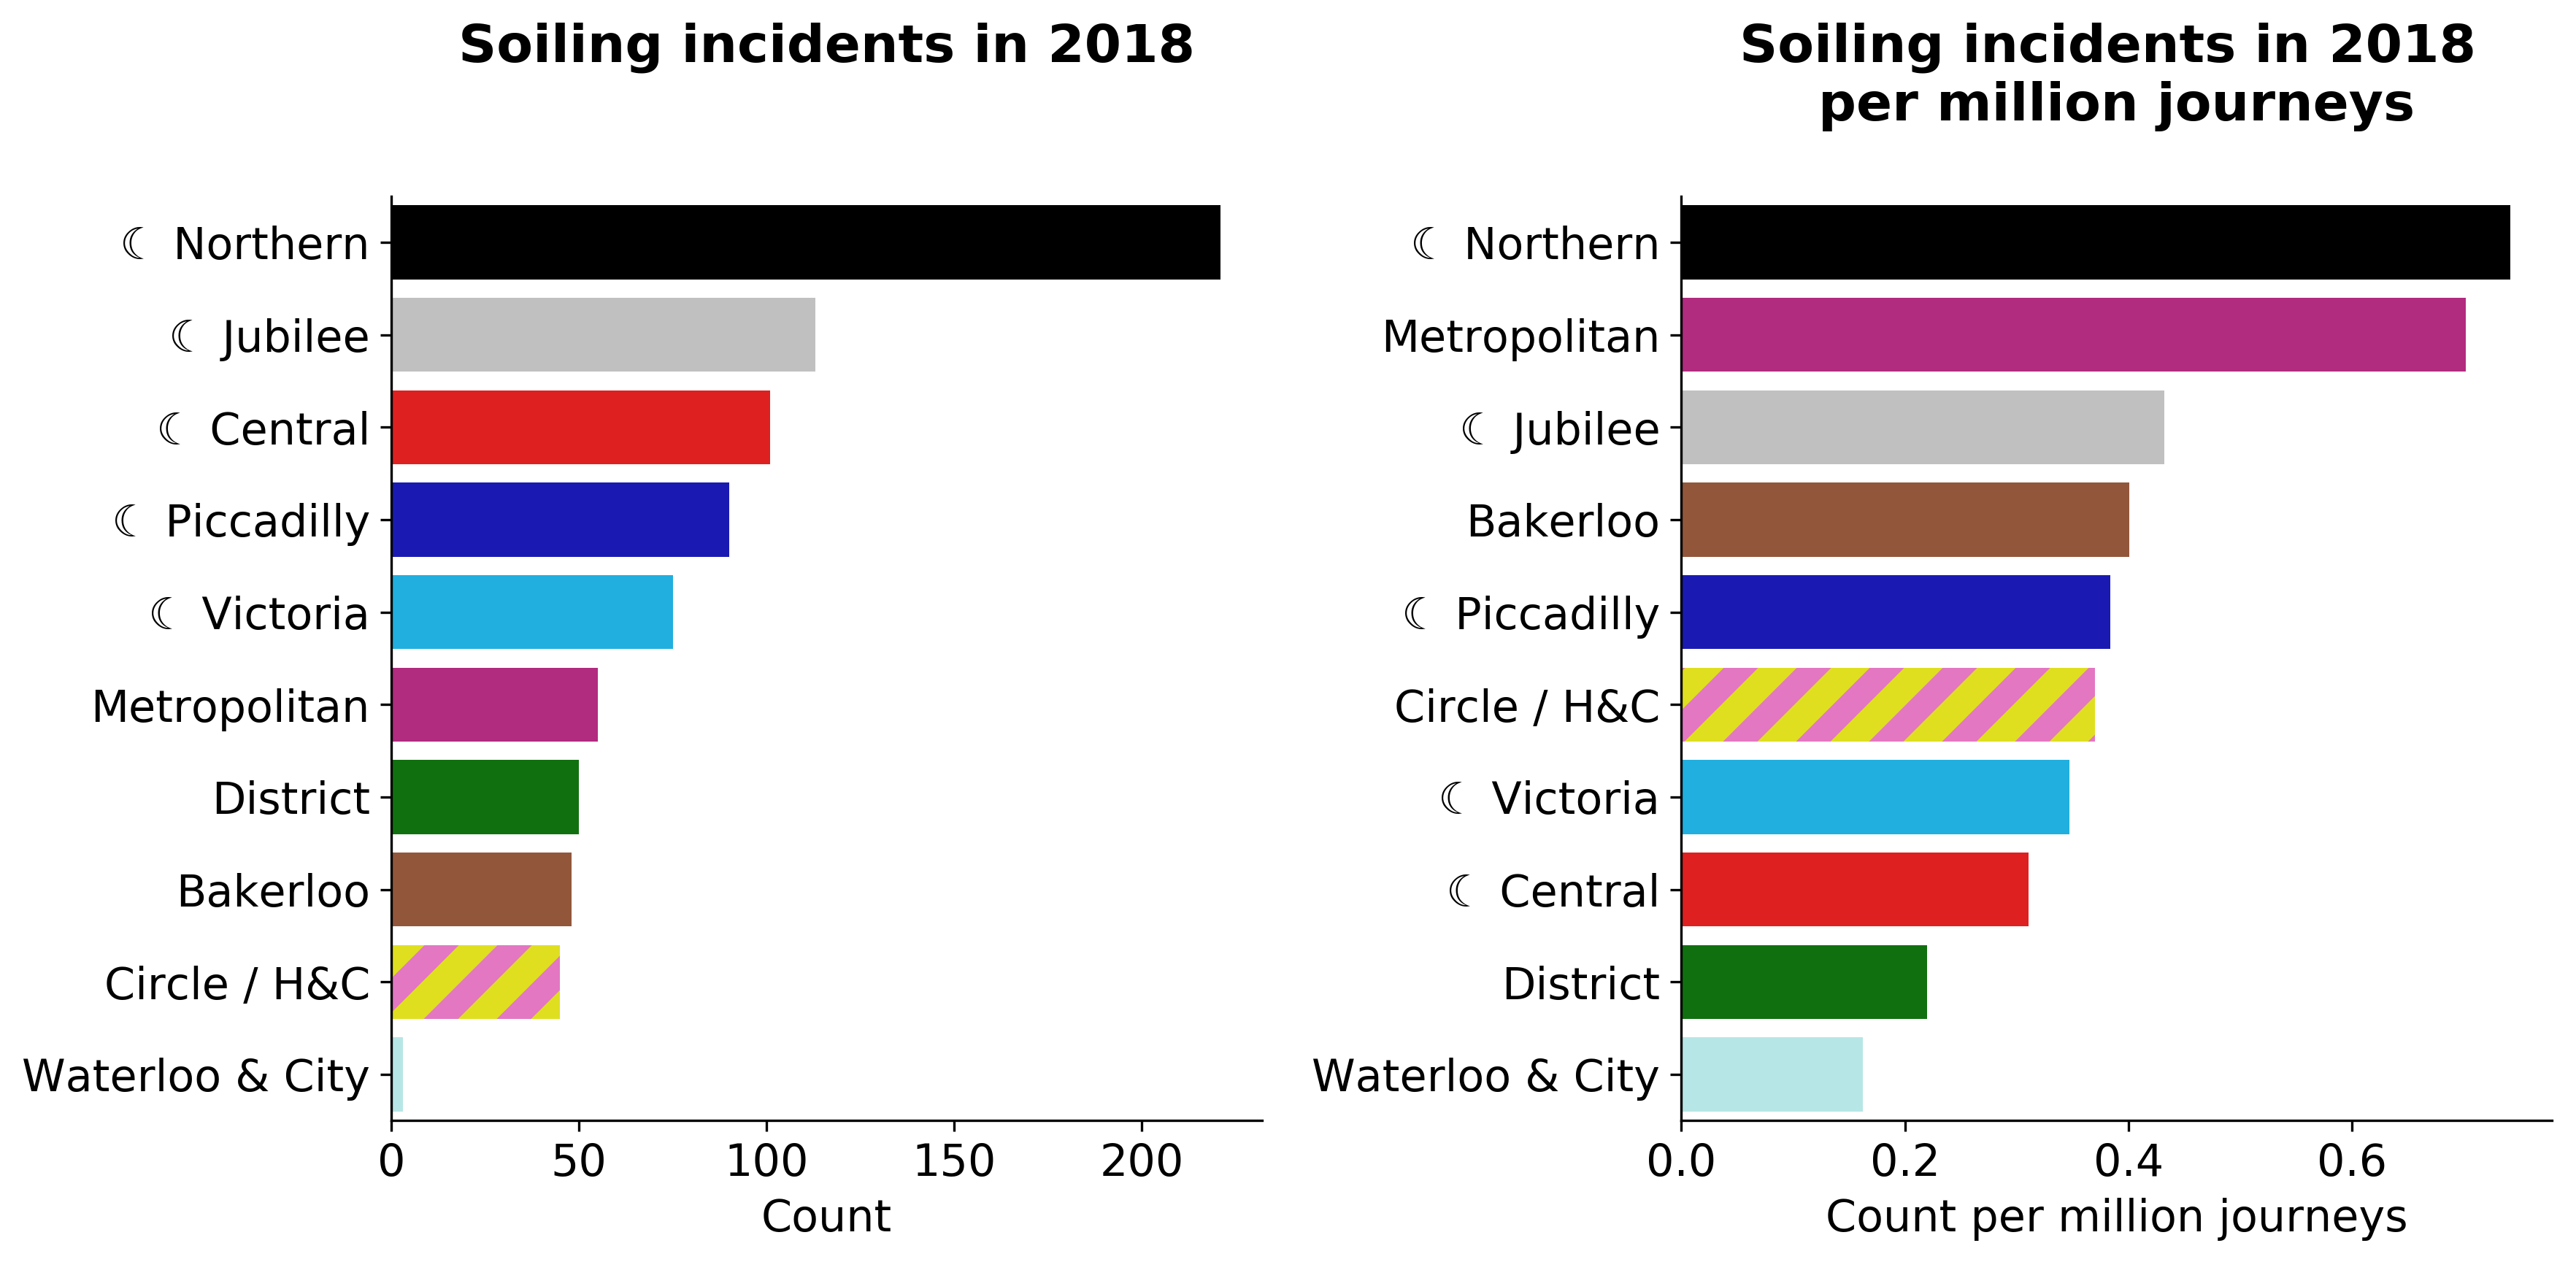

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=300)

ax1 = plt.subplot(1, 2, 1)
plt.rcParams.update({'hatch.color': 'tab:pink', 'hatch.linewidth': 8.0})
bar = sns.barplot(journeys_soiling_count_moon['Count'], journeys_soiling_count_moon['index_moon2'],
           palette = tube_color_dict_moon)
hatches = ['','' ,'' ,'' ,'' ,'' ,'' ,'' , '/','' ]
for i,thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])
plt.ylabel('')
plt.xlabel('Count')
plt.title('Soiling incidents in 2018\n\n', fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(1, 2, 2)
bar = sns.barplot(journeys_soiling_pp_moon['pp_moon'], journeys_soiling_pp_moon['index_moon2'],
           palette = tube_color_dict_moon)
hatches = ['','' ,'' ,'' ,'' ,'/' ,'' ,'' , '','' ]
for i,thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])
plt.ylabel('')
plt.xlabel('Count per million journeys')
plt.title('Soiling incidents in 2018 \nper million journeys\n', fontweight=1000)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('soiling-incidents-both-moon.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

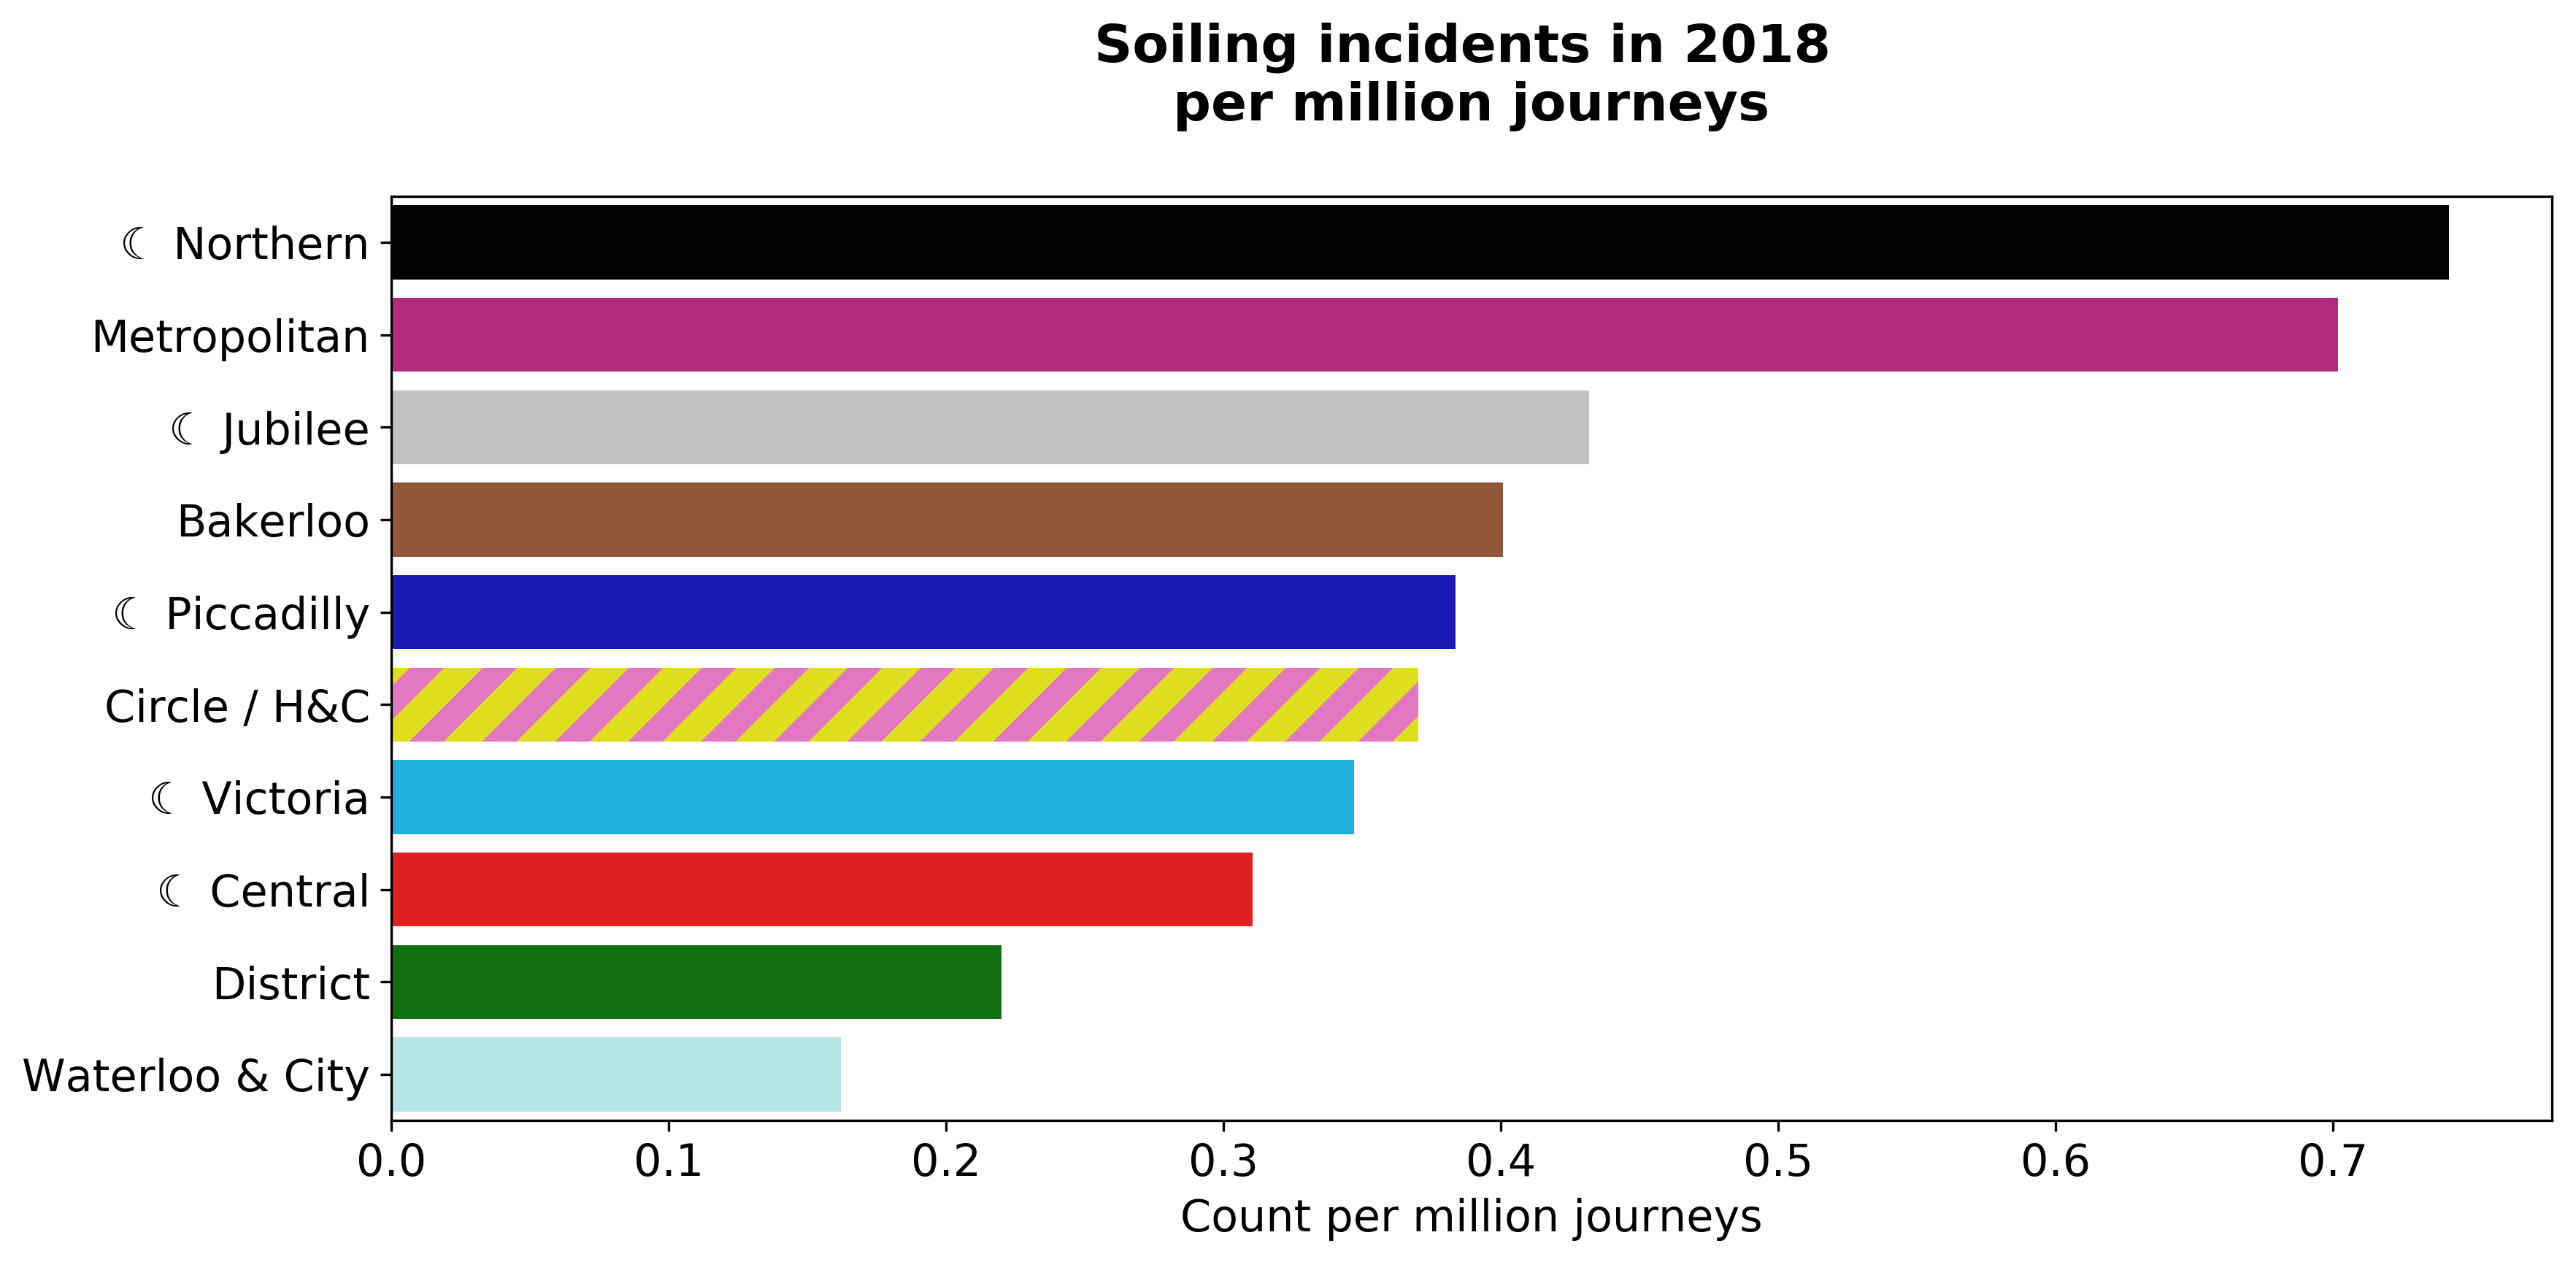

In [55]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

bar = sns.barplot(journeys_soiling_pp_moon['pp_moon'], journeys_soiling_pp_moon['index_moon2'],
           palette = tube_color_dict_moon)
hatches = ['','' ,'' ,'' ,'' ,'/' ,'' ,'' , '','' ]
for i,thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])
plt.ylabel('')
plt.xlabel('Count per million journeys')
plt.title('Soiling incidents in 2018 \nper million journeys\n', fontweight=1000)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('soiling-incidents-pp-moon.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

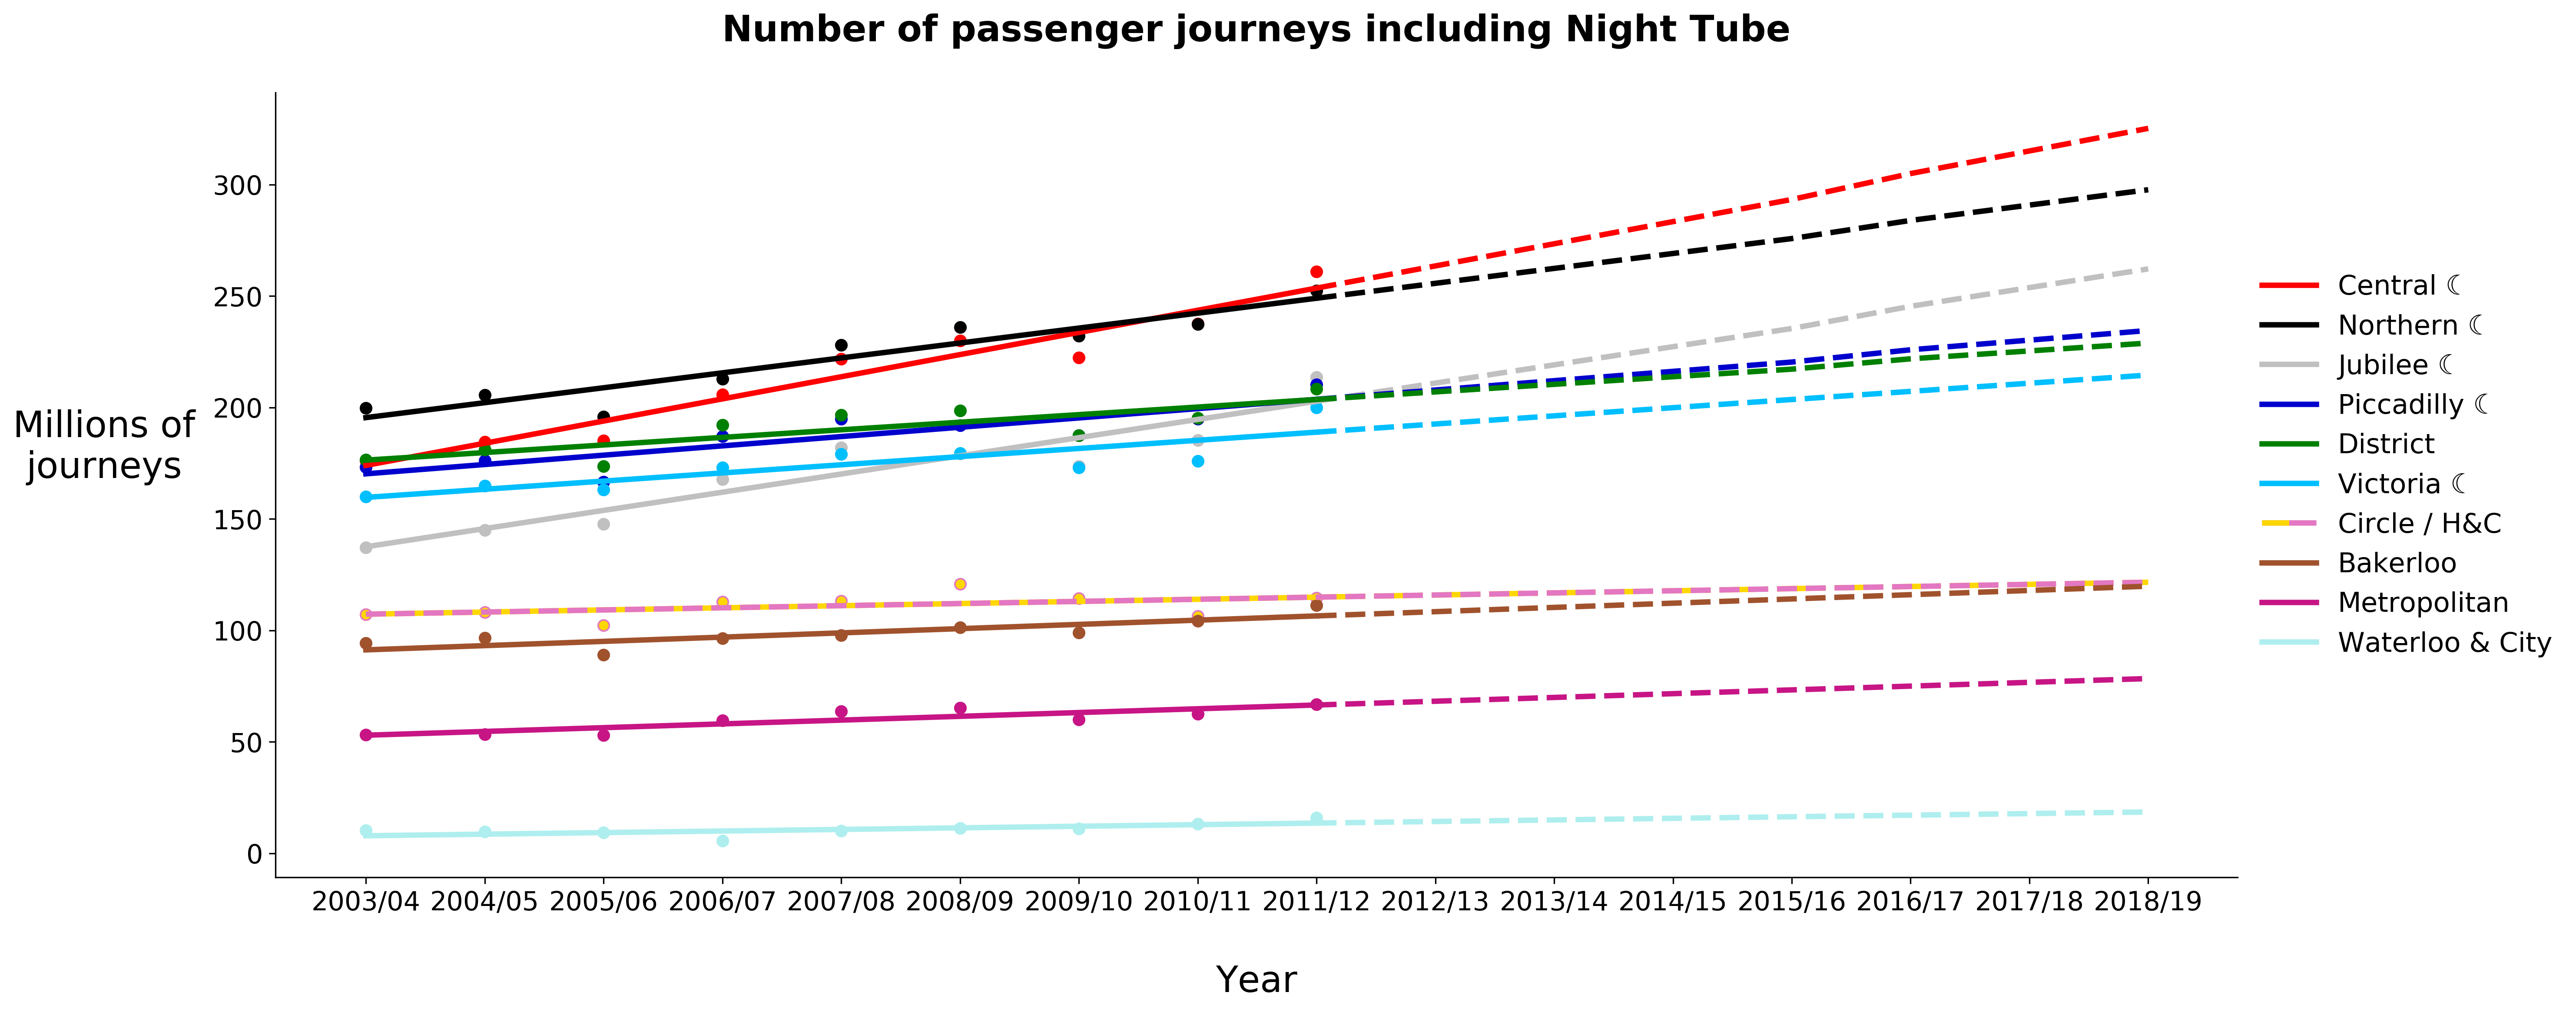

In [53]:
results = pd.DataFrame({'year': extra_years})

plt.rcParams.update({'font.size': 14.5})
fig, ax = plt.subplots(figsize=(20, 8), dpi=300)
#ax.set_facecolor('linen')

## Plot solid lines up until Circle / H&C
for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys_soiling_count_moon.loc[journeys.columns[col], 'index_moon3'])
    plt.xticks(np.arange(1,17), tick_names)
    
## Plot solid Circle / H&C
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color='tab:pink')
    plt.scatter(x, y, s=18, color='gold')
    plt.plot(x, regr.predict(x), color='gold', linewidth=3, linestyle='-', label=journeys.columns[col])
    plt.plot(x, regr.predict(x), color='tab:pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line1 = lines.Line2D([], [], linewidth=3, linestyle="--", dashes=(10, 1), color='tab:pink')
    dotted_line2 = lines.Line2D([], [], linewidth=3, linestyle='-', dashes=(5, 5), color='gold')
    plt.xticks(np.arange(1,17), tick_names)
    
## Plot lines after Circle / H&C
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,17), tick_names)
    
## Plot dashed prediction lines
for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    x2_pred = regr.predict(x2)
    x2_pred_night = x2_pred + np.array([0, 0, 0, 0, 0, journeys_soiling_count_moon.iloc[col, 11], journeys_soiling_count_moon.iloc[col, 12], journeys_soiling_count_moon.iloc[col, 13],])
    #print(x2_pred)
    #print(x2_pred_night)
    plt.plot(x2, x2_pred_night, color=colors[col], linewidth=3, linestyle='dashed', label=journeys.columns[col])
    plt.xticks(np.arange(1,17), tick_names)
    results[journeys.columns[col]] = np.array(regr.predict(x2)[1:])
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color='gold', linewidth=3, linestyle='-.', label=journeys.columns[col])
    plt.plot(x2, regr.predict(x2), color='tab:pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line3 = lines.Line2D([], [], linewidth=3, linestyle="--", color='tab:pink')
    dotted_line4 = lines.Line2D([], [], linewidth=3, linestyle='-', color='gold')
    plt.xticks(np.arange(1,17), tick_names)
    results[journeys.columns[col]] = np.array(regr.predict(x2)[1:])
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    x2_pred = regr.predict(x2)
    x2_pred_night = x2_pred + np.array([0, 0, 0, 0, 0, journeys_soiling_count_moon.iloc[col, 11], journeys_soiling_count_moon.iloc[col, 12], journeys_soiling_count_moon.iloc[col, 13],])
    plt.plot(x2, x2_pred_night, color=colors[col], linewidth=3, linestyle='dashed', label=journeys.columns[col])
    plt.xticks(np.arange(1,17), tick_names)
    results[journeys.columns[col]] = np.array(regr.predict(x2)[1:])

## Graph features
plt.xlabel('\nYear', fontsize=20)
plt.ylabel('Millions of\njourneys', fontsize=20, rotation=0, labelpad=60)
handles, labels = ax.get_legend_handles_labels()
plt.legend((handles[0:6] + [(dotted_line1, dotted_line2)] + handles[8:11]),
           (labels[0:6] + labels[7:11]),
           loc='upper left',
           bbox_to_anchor=(1, 0.8),
          frameon=False,
          prop={'size': 15})
plt.title('Number of passenger journeys including Night Tube\n', fontsize=20, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('journeys-extend-night.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [52]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))